<a href="https://colab.research.google.com/github/lucasllimati/Bootcamp-Data-Science-Aplicada/blob/main/05_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01.Entendendo a série temporal

Analisando dados de COVID com Python e Pandas
Dataset: https://www.seade.gov.br/coronavirus/


# Aula 1.3

In [1]:
url = 'https://github.com/allanspadini/Prophet_covid/raw/main/dados_covid_sp.zip'

In [2]:
# Bibliotecas

import pandas as pd
from pandas.plotting import autocorrelation_plot
import datetime
import numpy as np
import statsmodels.tsa.api

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

import warnings
#warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dados = pd.read_csv(url, sep=';')

In [4]:
dados.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
0        Adamantina      3500105   25  ...  -21,6820  -51,0737              9
1            Adolfo      3500204   25  ...  -21,2325  -49,6451              9
2             Aguaí      3500303   25  ...  -22,0572  -46,9735              9
3    Águas da Prata      3500402   25  ...  -21,9319  -46,7176              9
4  Águas de Lindóia      3500501   25  ...  -22,4733  -46,6314              9

[5 rows x 26 columns]

In [5]:
dados['datahora'] = pd.to_datetime(dados['datahora'],format='%Y-%m-%d')

In [6]:
import matplotlib as mpl

In [7]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

In [8]:
import seaborn as sns

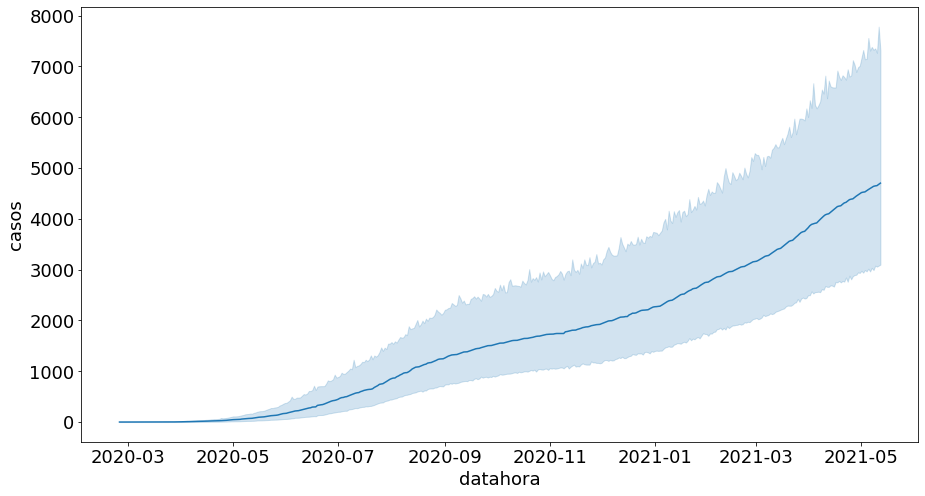

In [9]:
sns.lineplot(x='datahora', y='casos', data=dados)

$$e^x$$

In [10]:
import numpy as np

In [11]:
eixo_x = np.linspace(-2,2,100)

In [12]:
y_exp = np.exp(eixo_x)

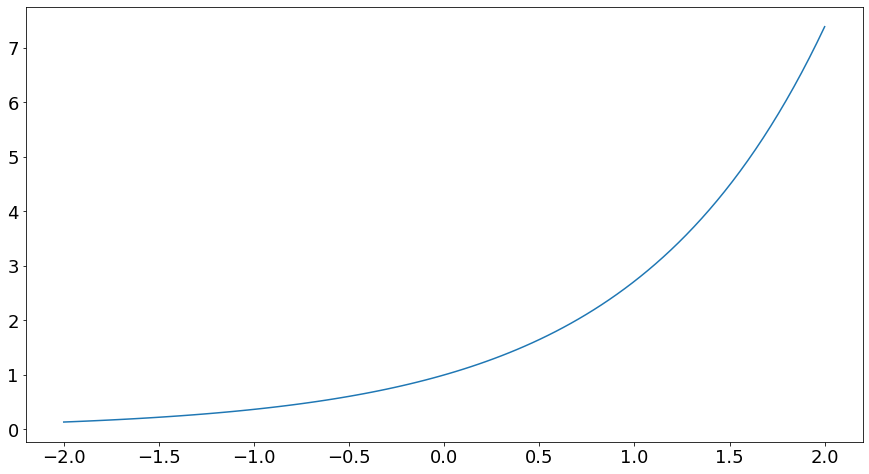

In [13]:
sns.lineplot(x=eixo_x, y=y_exp)

$$ log_2 2 = 1 $$
$$ log_2 2^x = x $$
$$ log_e e^x = x $$

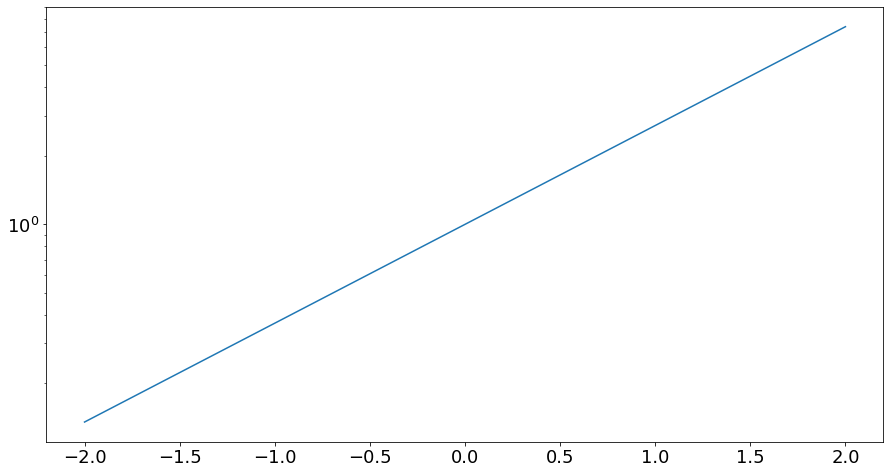

In [14]:
sns.lineplot(x=eixo_x, y=y_exp)
mpl.pyplot.yscale('log')

In [15]:
dados_sp = dados.query('nome_munic == "São Paulo"')

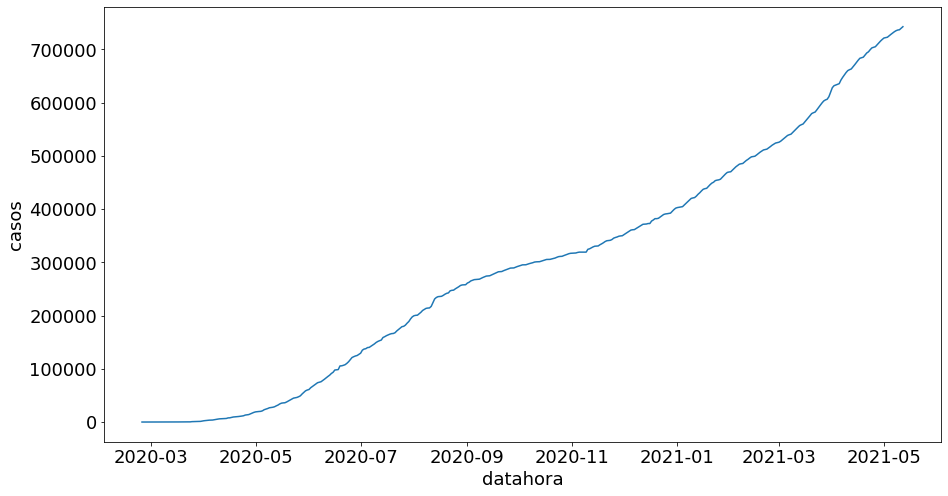

In [16]:
sns.lineplot(x='datahora', y='casos', data=dados_sp)

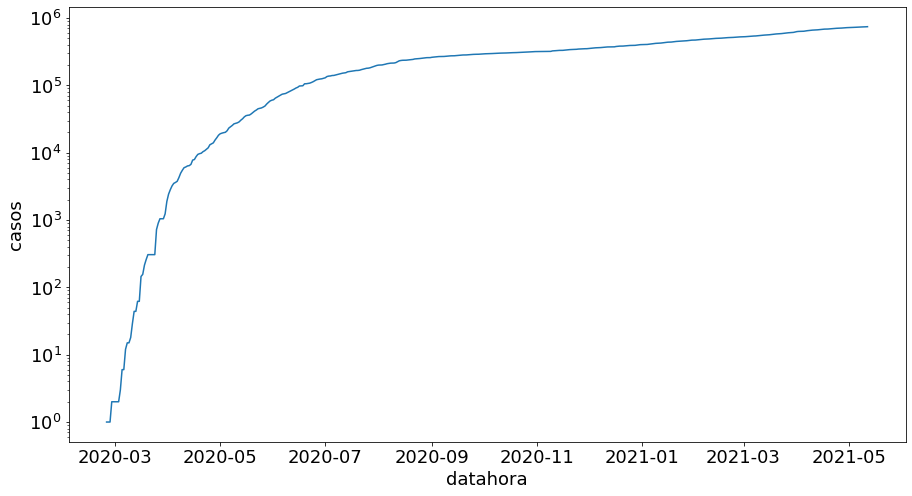

In [17]:
sns.lineplot(x='datahora', y='casos', data=dados_sp)
mpl.pyplot.yscale('log')

## Desafio 01: Filtrar a base com alguma outra função.

Temos as alternativas abaixo para gerar o mesmo recorte no dataset.

In [18]:
df_sp = dados[(dados['nome_munic'] == 'São Paulo')]
df_sp.shape

(443, 26)

In [19]:
df_sp2 = dados.loc[(dados['nome_munic'] == 'São Paulo')]
df_sp2.shape

(443, 26)

## Desafio 02: Escolher outro municipio.

Vou tentar refazer a análise com um grupo de 3 municípios.

A ideia é pegar municípios semelhantes em termos de população. Vamos tentar com:
* Santos: 433.656 habitantes
* Diadema: 426.757 habitantes
* Jundiaí: 423.006 habitantes

Fonte: [Wikipedia](https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_S%C3%A3o_Paulo_por_popula%C3%A7%C3%A3o)

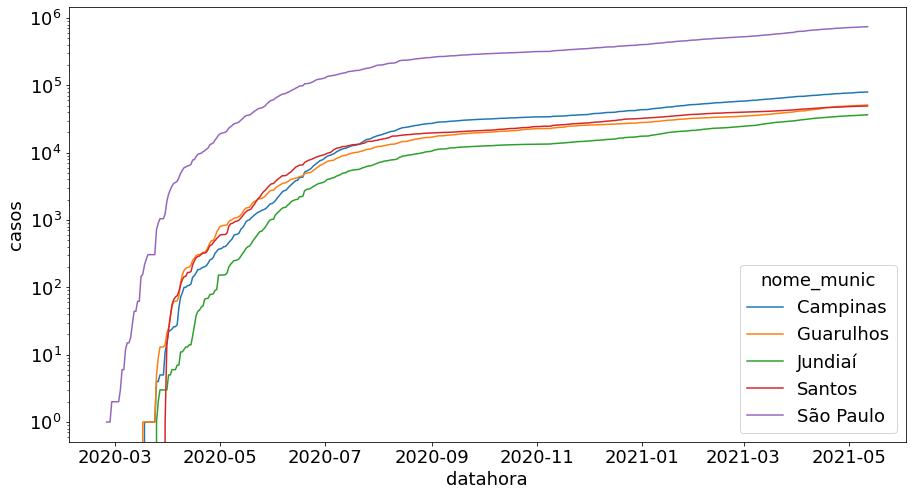

In [20]:
lista_cidades = ['São Paulo','Santos','Campinas','Jundiaí','Guarulhos']

dados_desafio = dados[(dados['nome_munic'].isin(lista_cidades))]
sns.lineplot(x = 'datahora',
             y = 'casos',
             hue='nome_munic',
             data = dados_desafio)
mpl.pyplot.yscale('log')

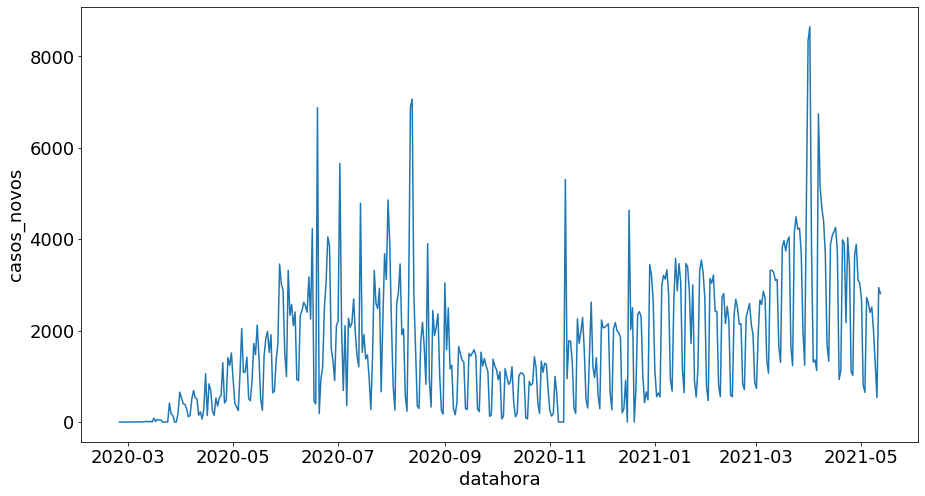

In [21]:
sns.lineplot(x='datahora', y='casos_novos', data = dados_sp)

In [22]:
dados_exemplo = pd.DataFrame(data=np.linspace(1,10,10))

In [23]:
dados_exemplo.head()

0
0  1.0
1  2.0
2  3.0
3  4.0
4  5.0

In [24]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()
dados_exemplo

0  diferenciado
0   1.0           NaN
1   2.0           1.0
2   3.0           1.0
3   4.0           1.0
4   5.0           1.0
5   6.0           1.0
6   7.0           1.0
7   8.0           1.0
8   9.0           1.0
9  10.0           1.0

In [25]:
# sns.lineplot(data = dados_exemplo)
# sns.lineplot(data = dados_exemplo, x = 0, y = 'diferenciado', color = 'red')

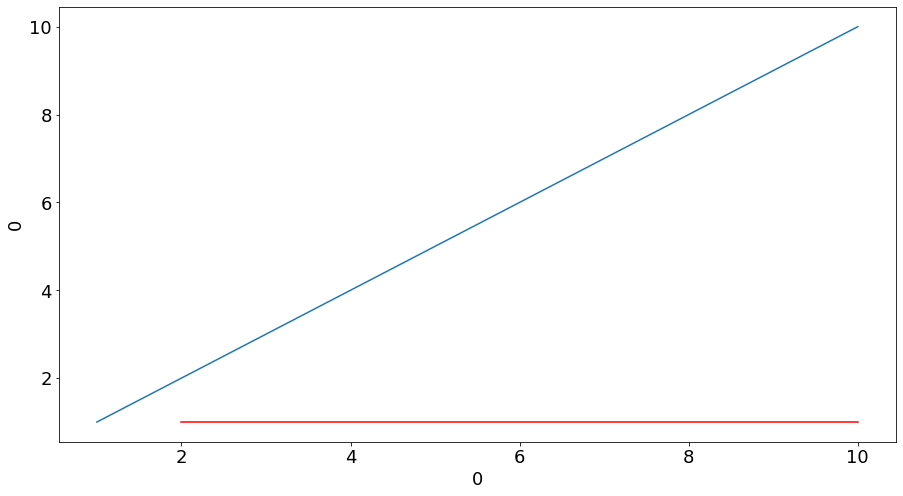

In [26]:
sns.lineplot(x=0, y=0, data=dados_exemplo)
sns.lineplot(x=0, y='diferenciado', data=dados_exemplo, color = 'red')

$$ y = ax + b $$
$$ y = 1x + b $$

In [27]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

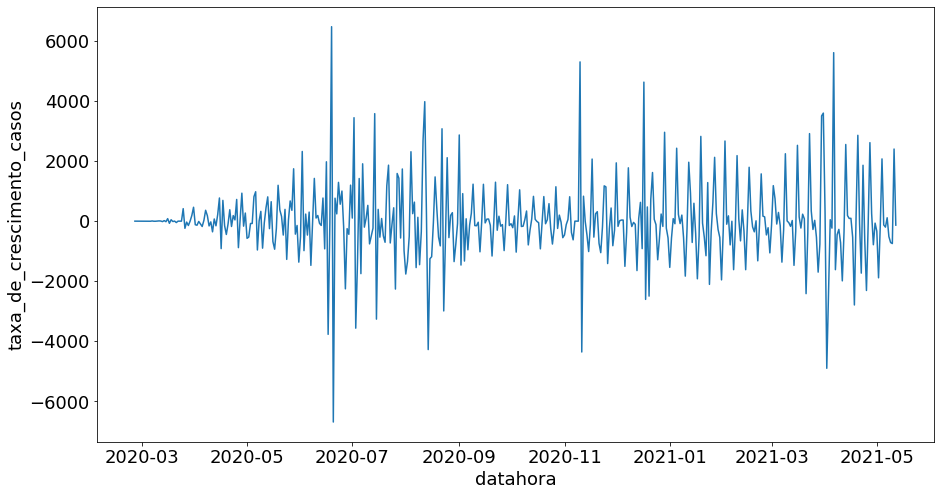

In [28]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp)

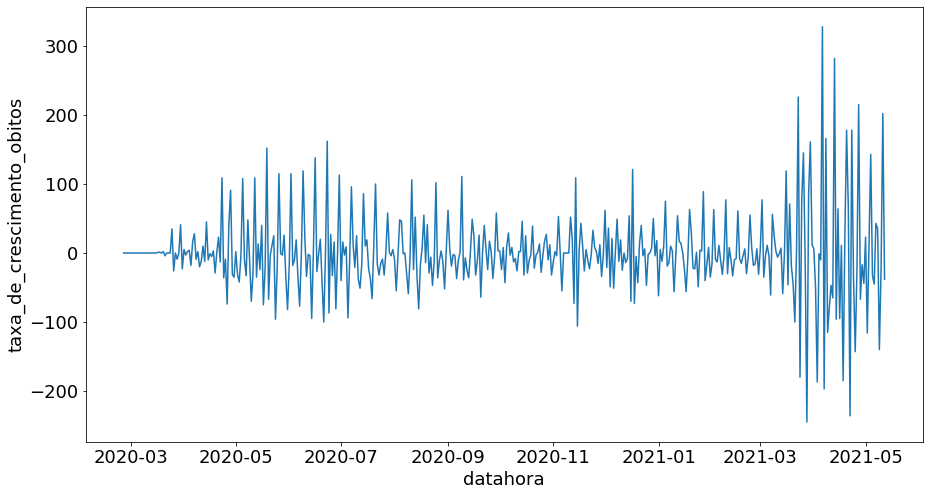

In [29]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp)

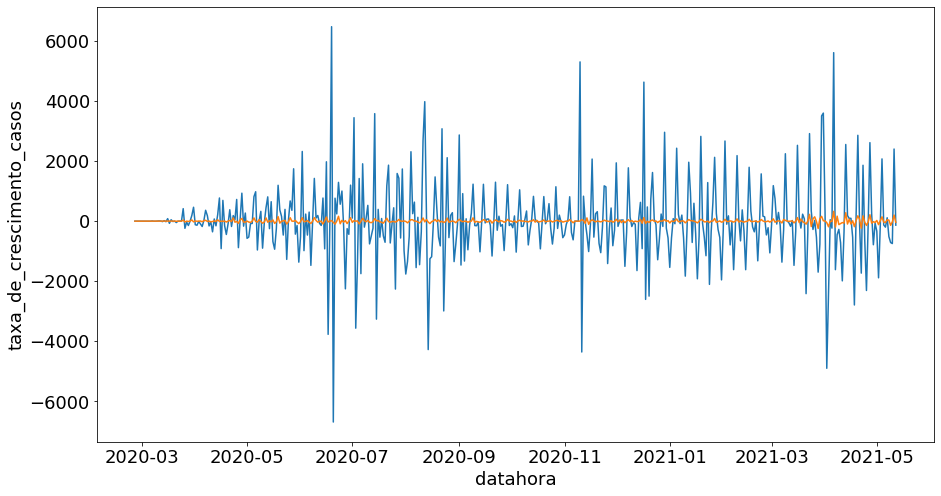

In [30]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp)
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp)

In [31]:
import matplotlib.pyplot as plt

<BarContainer object of 443 artists>

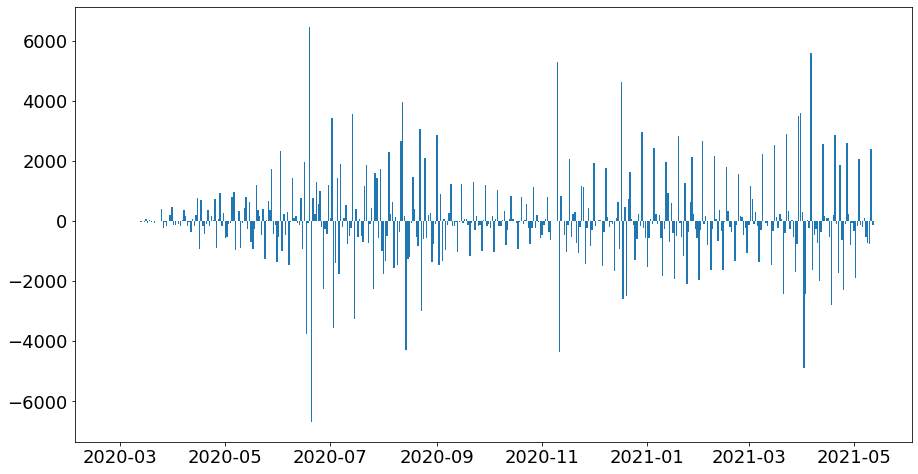

In [32]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'])

In [33]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

In [34]:
dados_2021 = dados_sp.query('ano == 2021')

<BarContainer object of 132 artists>

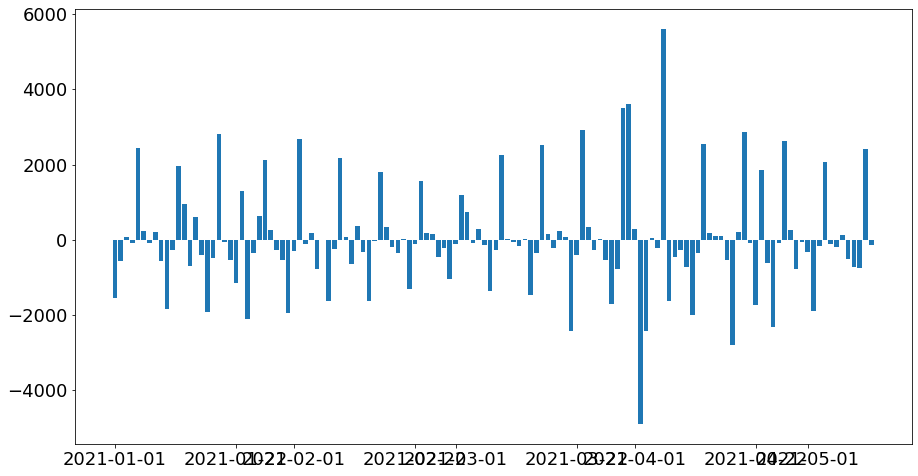

In [35]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])

In [36]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

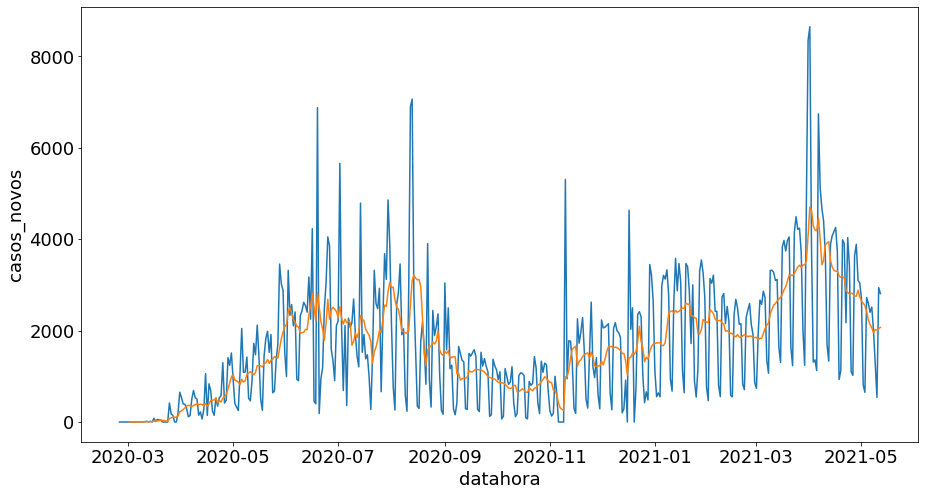

In [37]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_sp)
sns.lineplot(x='datahora', y='media_movel_casos', data=dados_sp)

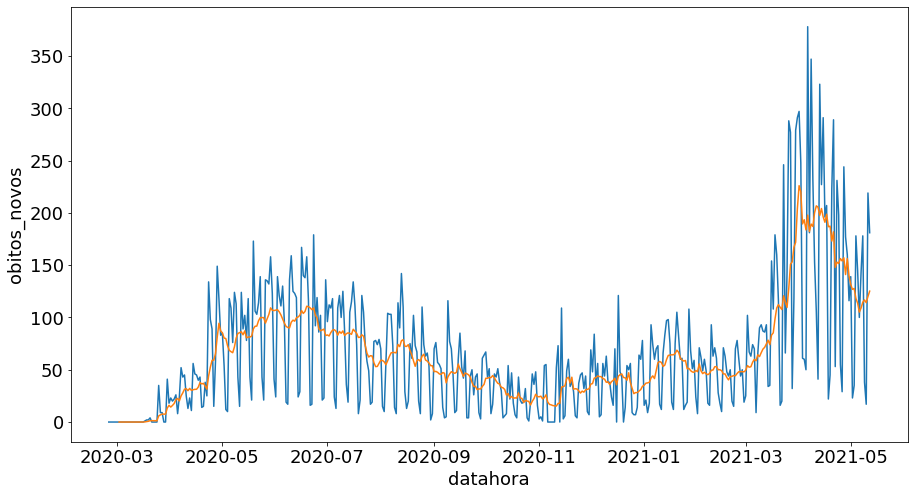

In [38]:
sns.lineplot(x='datahora', y='obitos_novos', data=dados_sp)
sns.lineplot(x='datahora', y='media_movel_obitos', data=dados_sp)

## Desafio 01: Mostrar o notebook sem os warnings

Estou deixando os códigos comentados, por enquanto, para não ficar sem os warnings, mas a solução está abaixo.

In [39]:
#import warnings
#warnings.filterwarnings('ignore')

## Desafio 02: Pico da taxa de casos novos coincide com a taxa dos óbitos novos

Optei por trabalhar com um eixo y secundário para ficar mais fácil de visualizar as variações, já que usando um eixo único a escala praticamente impossibilita a visualização dos óbitos.

O pico de casos novos, em azul, ocorrido do final de junho/2020 não parece ter tido um impacto muito grande na taxa de óbitos (em laranja), bem como no pico do final de 2020.

Já o pico de abril a maio de 2021 parece ter tido mais impacto, deixando a taxa de óbitos com maior oscilação.

In [40]:
dados_sp['taxa_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

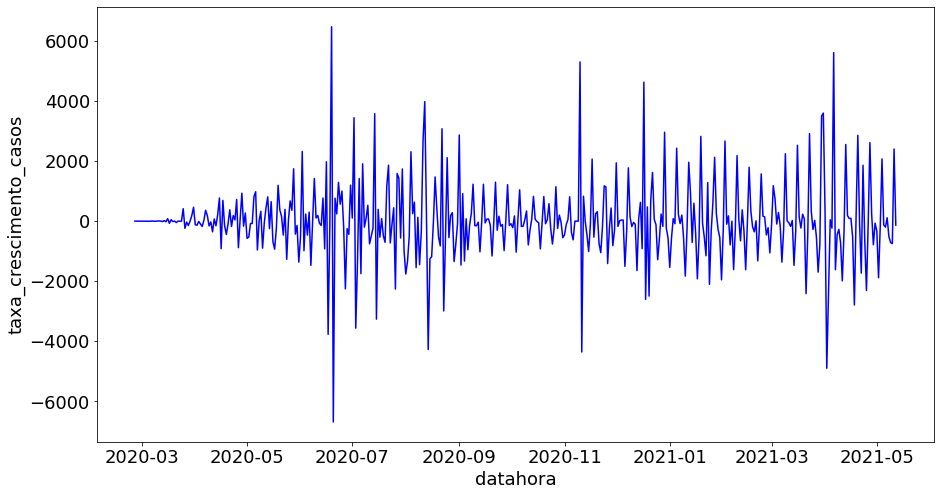

In [41]:
sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_casos',
             data = dados_sp,
             color = 'blue')

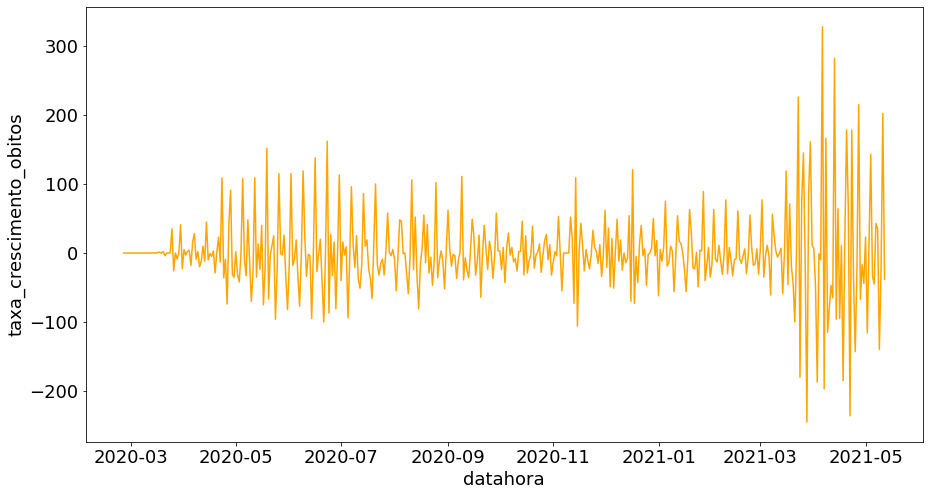

In [42]:
sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_obitos',
             data = dados_sp,
             color = 'orange')

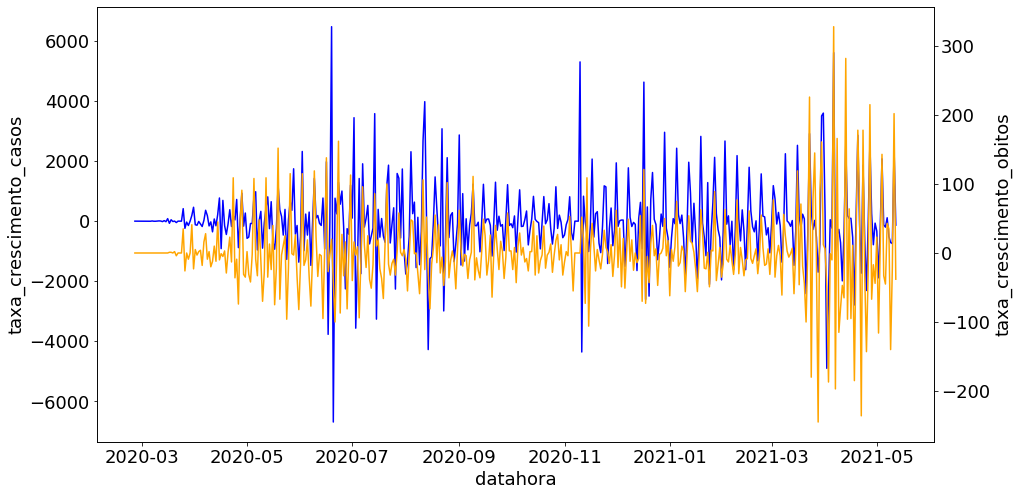

In [43]:
sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_casos',
             data = dados_sp,
             color = 'blue')

plt.twinx()

sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_obitos',
             data = dados_sp,
             color = 'orange')

## Desafio 03: Deixar os gráficos mais bonitos

Ajustar inclinação das labels do eixo x, colocar títulos, nomes dos eixos.

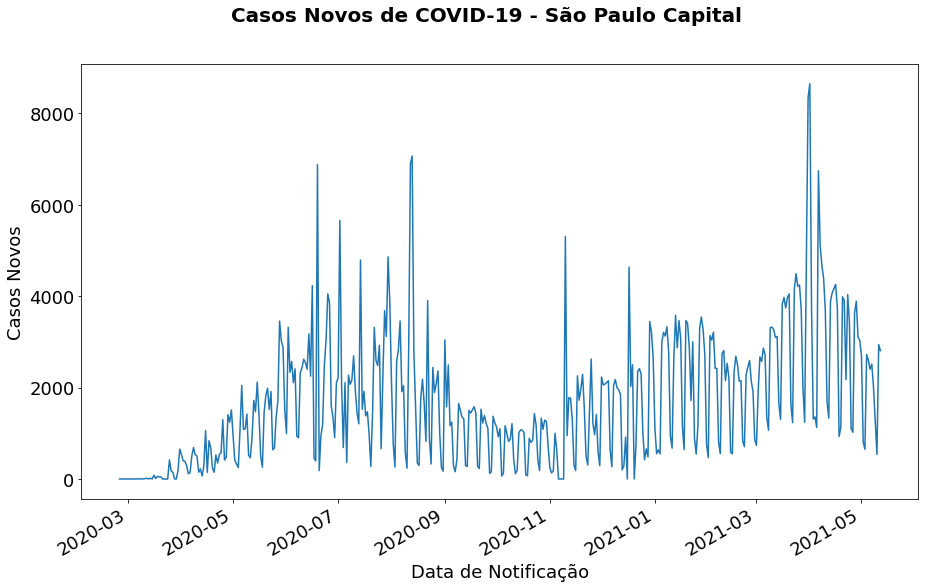

In [44]:
sns.lineplot(x = 'datahora',
             y = 'casos_novos',
             data = dados_sp)

plt.suptitle('Casos Novos de COVID-19 - São Paulo Capital',
             fontsize=20,fontweight='bold')
plt.xlabel('Data de Notificação')
plt.ylabel('Casos Novos')
plt.xticks(rotation=30,ha='right')
plt.show()

## Desafio 04: Gerar o gráfico da média móvel do número de óbitos. Mudar os gráficos de casos de linhas para barra.

In [45]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

# window = 7, trata a janela de observação como sendo de 7 dias
# center = False).mean() joga o ponto para o final da semana

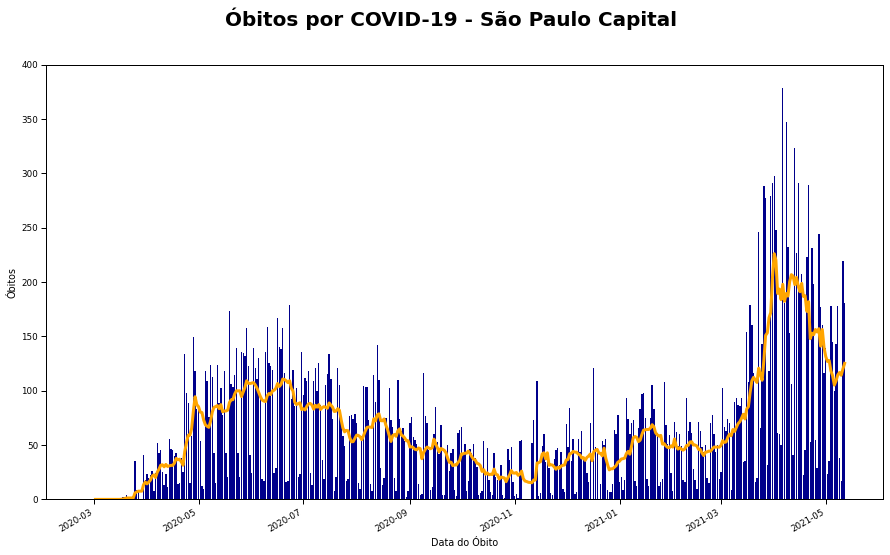

In [46]:
sns.set_context('paper')
sns.lineplot(x = 'datahora',
             y = 'media_movel_obitos',
             data = dados_sp,
             color = 'orange',
             linewidth = 3)
plt.bar(x = dados_sp['datahora'],
        height = dados_sp['obitos_novos'],
        color = 'darkblue')

plt.ylim(0,400)
plt.suptitle('Óbitos por COVID-19 - São Paulo Capital',
             fontsize=20,fontweight='bold')
plt.xlabel('Data do Óbito')
plt.ylabel('Óbitos')
plt.xticks(rotation=30,ha='right')
plt.show()

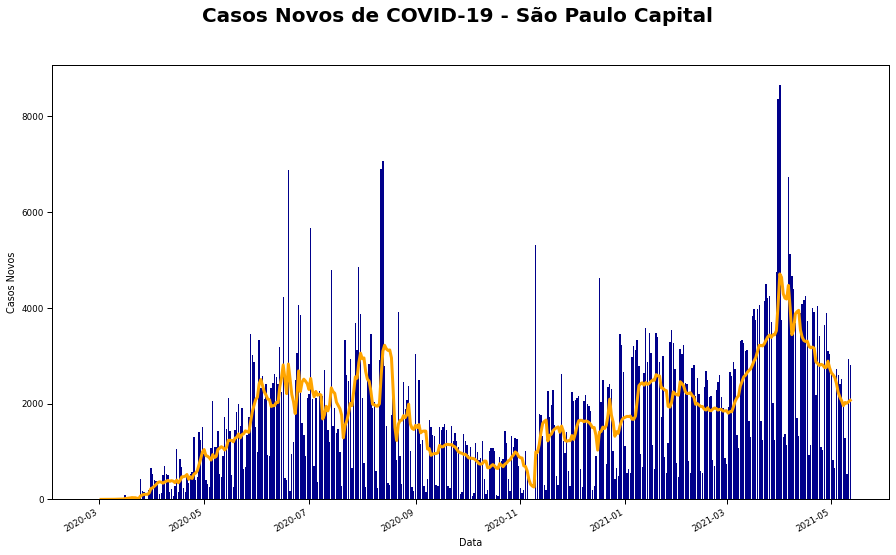

In [47]:
sns.set_context('paper')
sns.lineplot(x = 'datahora',
             y = 'media_movel_casos',
             data = dados_sp,
             color = 'orange',
             linewidth = 3)
plt.bar(x = dados_sp['datahora'],
        height = dados_sp['casos_novos'],
        color = 'darkblue')

plt.suptitle('Casos Novos de COVID-19 - São Paulo Capital',
             fontsize=20,fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Casos Novos')
plt.xticks(rotation=30,ha='right')
plt.show()

## Desafio 05: Mover o número de óbitos alguns dias e verificar o resultado no gráfico

Resolvi gerar essas visualizações adicionais a título de curiosidade, para ver o quanto mais ficariam suavizadas as curvas dobrando a janela de média móvel para 14 dias.

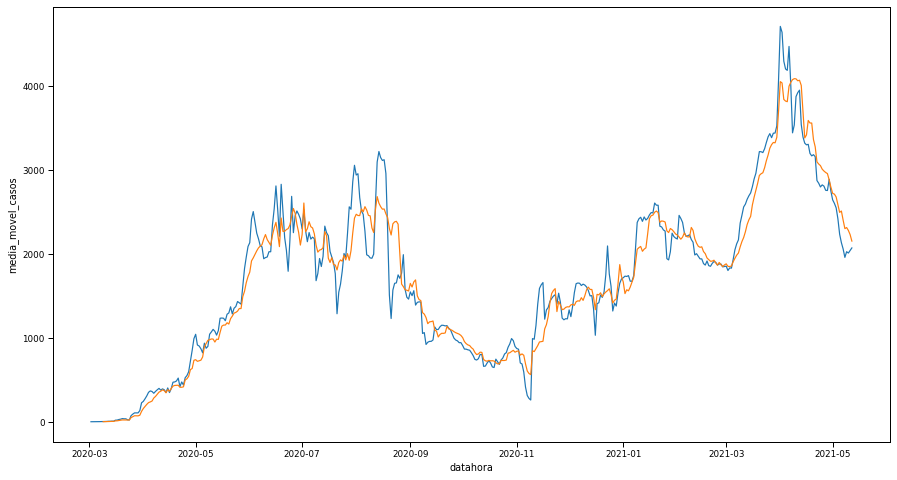

In [48]:
dados_sp['MM14 Casos Novos'] = dados_sp['casos_novos'].rolling(window = 14, center = False).mean()
sns.lineplot(x = 'datahora',
             y = 'media_movel_casos',
             data = dados_sp)
sns.lineplot(x = 'datahora',
             y = 'MM14 Casos Novos',
             data = dados_sp)

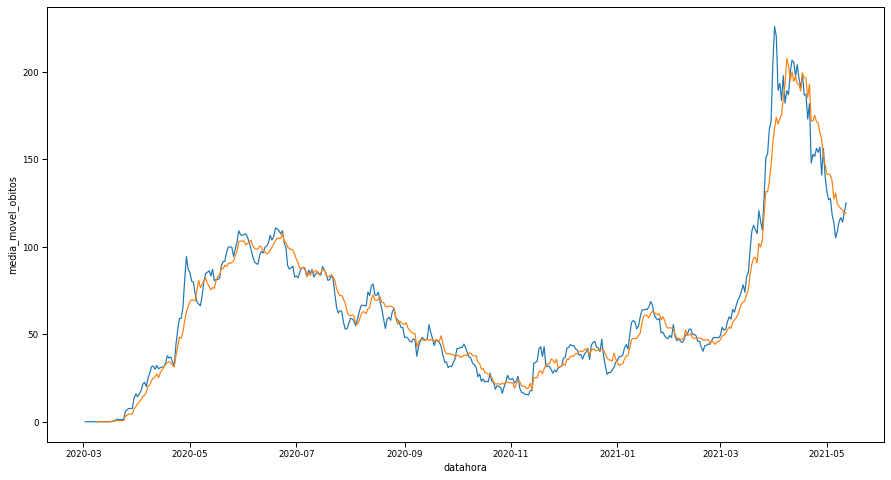

In [49]:
dados_sp['MM14 Óbitos Novos'] = dados_sp['obitos_novos'].rolling(window = 14, ## trata a janela de observação como sendo de 14 dias
                                                                       center = False).mean() ## joga o ponto para o final da semana
sns.lineplot(x = 'datahora',
             y = 'media_movel_obitos',
             data = dados_sp)
sns.lineplot(x = 'datahora',
             y = 'MM14 Óbitos Novos',
             data = dados_sp)

## Desafio 06: Função de Correlação cruzada dos óbitos e casos.

>Deslocando os dados de óbitos 14 dias para frente e 14 dias para trás em relação aos dados de casos novos, verificar se isso altera a correlação, deixando o gráfico mais parecendo uma reta.

---

Eu acho que deslocar os óbitos para frente não faz sentido, vale mais a pena testar mais janelas de dias para trás. Com isso vamos comparar os óbitos do dia **Z** com os casos do dia **Z - 14**, que é a relação mais provável, pois o paciente vai adoecer e, depois de um tempo, ou vai se curar ou vai falecer.

Pesquisando na internet, encontrei links que indicam o tempo médio entre os primeiros sintomas e o óbito variando entre 14 e 28 dias (links [aqui](https://www.cnnbrasil.com.br/saude/2021/03/24/tempo-medio-ate-morte-por-covid-19-em-utis-de-sp-caiu-4-dias-no-ultimo-trimestre) e [aqui](https://diariodonordeste.verdesmares.com.br/metro/tempo-medio-entre-inicio-de-sintomas-e-morte-por-covid-no-ceara-e-10-dias-maior-na-segunda-onda-1.3097493)).

Por isso vou gerar as colunas com os dados de óbitos antecipados em 14, 21 e 28 dias e verificar se existe uma correlação maior de alguma dessas séries com a quantidade de casos novos.

In [50]:
dados_sp['Óbitos -14'] = dados_sp['obitos_novos'].shift(-14)
dados_sp['Óbitos -21'] = dados_sp['obitos_novos'].shift(-21)
dados_sp['Óbitos -28'] = dados_sp['obitos_novos'].shift(-28)

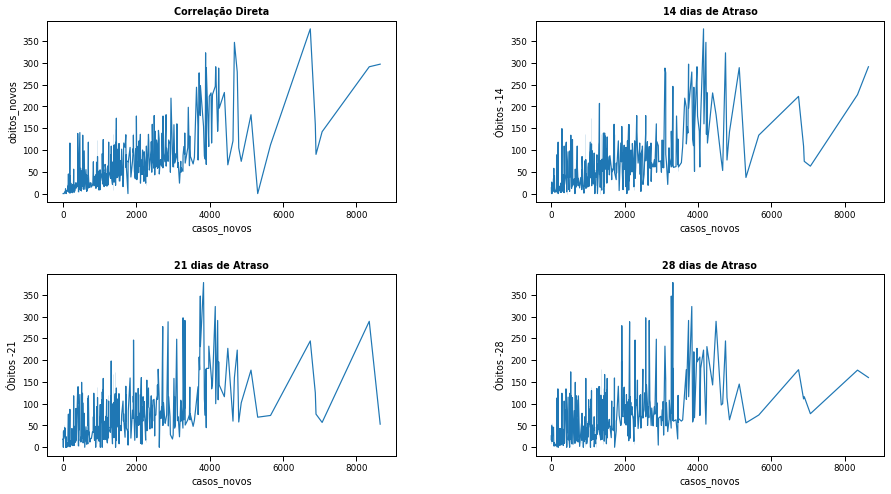

In [51]:
fig, ax = plt.subplots(nrows = 2,ncols=2)#,
                       #sharex = True, sharey = True)

ax[0,0] = sns.lineplot(x = 'casos_novos',
                       y = 'obitos_novos',
                       data = dados_sp,
                       ax = ax[0,0])
ax[0,0].set_title('Correlação Direta',fontweight='bold')

ax[0,1] = sns.lineplot(x = 'casos_novos',
                       y = 'Óbitos -14',
                       data = dados_sp,
                       ax = ax[0,1])
ax[0,1].set_title('14 dias de Atraso',fontweight='bold')

ax[1,0] = sns.lineplot(x = 'casos_novos',
                       y = 'Óbitos -21',
                       data = dados_sp,
                       ax = ax[1,0])
ax[1,0].set_title('21 dias de Atraso',fontweight='bold')

ax[1,1] = sns.lineplot(x = 'casos_novos',
                       y = 'Óbitos -28',
                       data = dados_sp,
                       ax = ax[1,1])
ax[1,1].set_title('28 dias de Atraso',fontweight='bold')

plt.subplots_adjust(wspace=0.4, 
                    hspace=0.4)

In [52]:
i_maior_correl = 0
maior_correl = 0
i_menor_correl = 0
menor_correl = 0

for i in list(range(0,int(dados_sp.shape[0]/2),1)):
    df_temp = pd.DataFrame()
    df_temp['casos'] = dados_sp['casos_novos']
    df_temp['obitos_desloc'] = dados_sp['obitos_novos'].shift(-i)
    df_temp.dropna(inplace=True)
    correl = np.corrcoef(df_temp['casos'],df_temp['obitos_desloc'])
    if correl[0,1] > maior_correl:
        maior_correl = correl[0,1]
        i_maior_correl = i
    elif correl[0,1] < menor_correl:
        menor_correl = correl[0,1]
        i_menor_correl = i

print('Maior -->',i_maior_correl,' - ',maior_correl)
print('Menor -->',i_menor_correl,' - ',menor_correl)

Maior --> 0  -  0.7355323571757685
Menor --> 157  -  -0.2251309282307848


Não percebi diferenças significativas entre os gráficos, por isso resolvi rodar o código acima, analisando qual a maior e qual a menor correlação entre os casos novos e os óbitos deslocados.

A maior correlação seria uma relação direta, mais próxima de 1, enquanto a menor correlação, quanto mais próxima de -1 indicaria uma correlação inversa.

Rodei as iterações até metade da base, pois a partir daí a quantidade de dados começa a ficar menor e pode gerar falsos resultados.

O resultado obtido foi de que a maior correlação direta é mesmo dos dados originais, sem deslocamento algum. E a correlação inversa é muito fraca, sendo o resultado mais significativo obtido com o deslocamento de 171 dias.

## Desafio 07: Estudar outros municípios

Vou tentar refazer a análise com um grupo de 3 municípios.

A ideia é pegar municípios semelhantes em termos de população. Vamos tentar com:
* Santos: 433.656 habitantes
* Diadema: 426.757 habitantes
* Jundiaí: 423.006 habitantes

Fonte: [Wikipedia](https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_S%C3%A3o_Paulo_por_popula%C3%A7%C3%A3o)

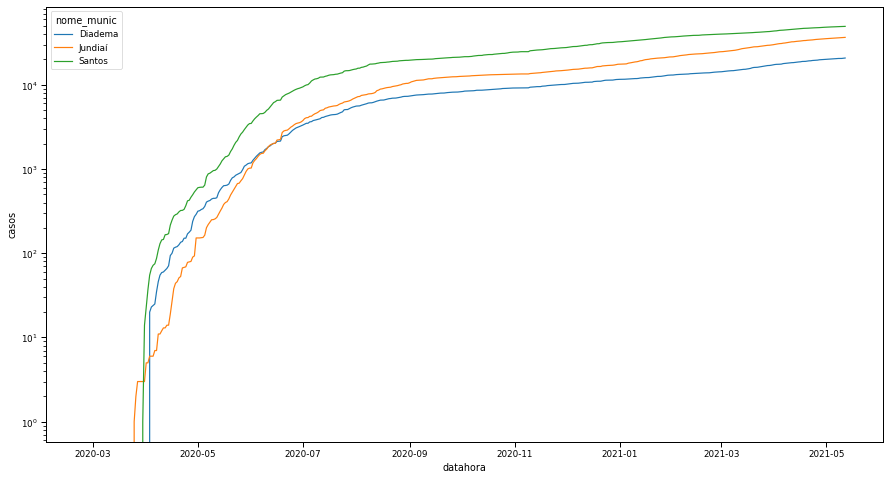

In [53]:
lista_cidades = ['Santos','Diadema','Jundiaí']

dados_desafio = dados[(dados['nome_munic'].isin(lista_cidades))]

sns.lineplot(x = 'datahora',
             y = 'casos',
             hue='nome_munic',
             data = dados_desafio)
mpl.pyplot.yscale('log')

Apesar de termos um comportamento semelhante, podemos ver que a fase aguda de Jundiaí foi bem menor que as demais.

De forma geral, todas apresentaram uma curva em 3 estágios, como São Paulo Capital.

Vamos comparar as curvas de surgimento de casos novos.

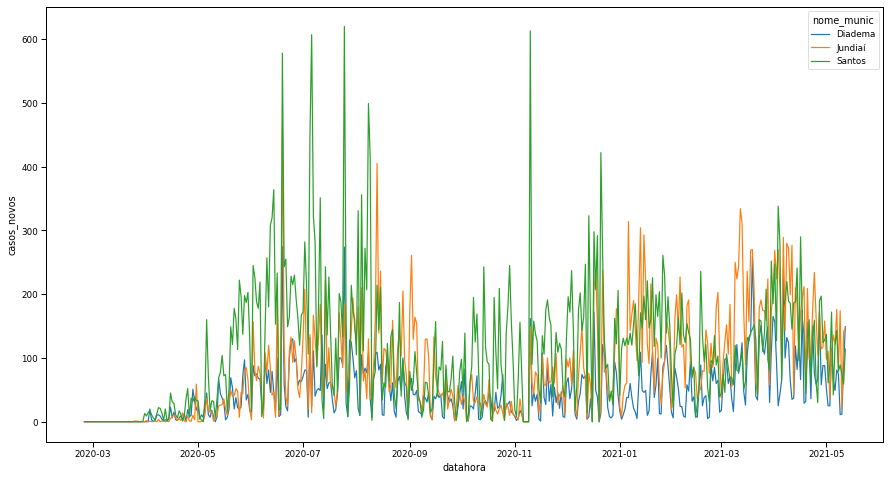

In [54]:
sns.lineplot(x = 'datahora',
             y = 'casos_novos',
             data = dados_desafio,
             hue = 'nome_munic')

O gráfico com as linhas sobrepostas fica de difícil visualização. Vamos separar e colocar em gráficos lado a lado.

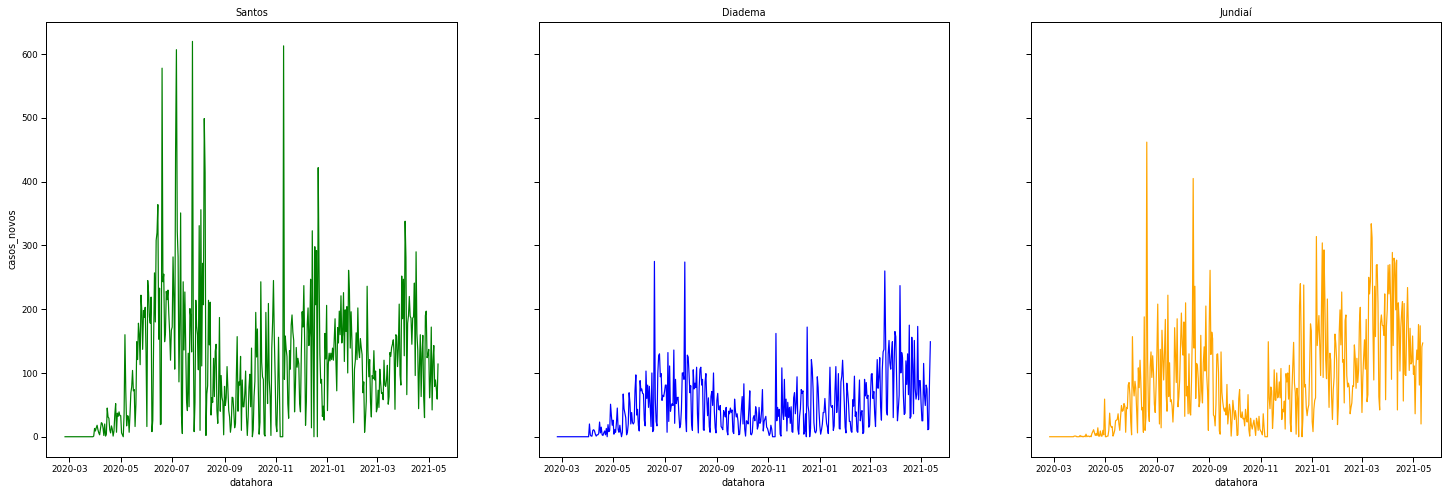

In [55]:
fig, ax = plt.subplots(ncols = 3,
                       sharey = True,
                       figsize = (25,8))

eixo = 0
lista_cores = {'Diadema':'blue',
               'Jundiaí':'orange',
               'Santos':'green'}

for i in lista_cidades:
    ax[eixo] = sns.lineplot(x = 'datahora',
                     y = 'casos_novos',
                     ax = ax[eixo],
                     color = lista_cores[i],
                     data = dados_desafio[(dados_desafio['nome_munic'] == i)])
    ax[eixo].set_title(i)
    eixo = eixo + 1

Apesar de estarmos lidando com cidades de populações similares, podemos verificar que o surgimento de casos novos apresentou picos muito maiores em Santos do que nas demais, sendo que Jundiaí já foi ligeiramene superior à Diadema.

In [56]:
colunas = dados.columns.to_list()
dados_desafio = pd.DataFrame(columns = colunas)

for i in lista_cidades:
    dados_temp = dados[(dados['nome_munic'] == i)]
    dados_temp['taxa_crescimento_casos'] = dados_temp[(dados_temp['nome_munic'] == i)]['casos_novos'].diff()
    dados_temp['taxa_crescimento_obitos'] = dados_temp[(dados_temp['nome_munic'] == i)]['obitos_novos'].diff()
    dados_desafio = dados_desafio.merge(dados_temp, how = 'outer')

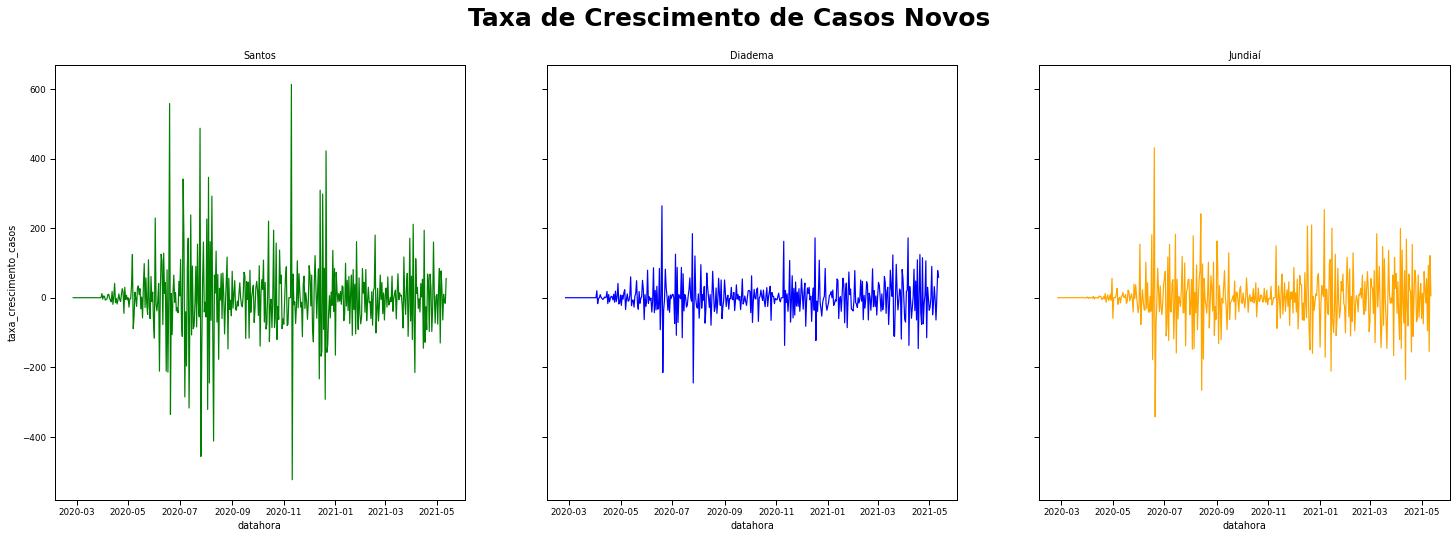

In [57]:
fig, ax = plt.subplots(ncols = 3,
                       sharey = True,
                       figsize = (25,8))

eixo = 0
fig.suptitle('Taxa de Crescimento de Casos Novos',
             fontsize=25,
             fontweight = 'bold')

for i in lista_cidades:
    ax[eixo] = sns.lineplot(x = 'datahora',
                     y = 'taxa_crescimento_casos',
                     ax = ax[eixo],
                     color = lista_cores[i],
                     data = dados_desafio[(dados_desafio['nome_munic'] == i)])
    ax[eixo].set_title(i)
    eixo = eixo + 1

Podemos observar que os picos de crescimento de casos em Santos se concentraram no início da pandemia, com um pico estranho no final do ano. Já o comportamento de Diadema e Jundiaí ficou semelhante, com Jundiaí em uma escala maior de valores.

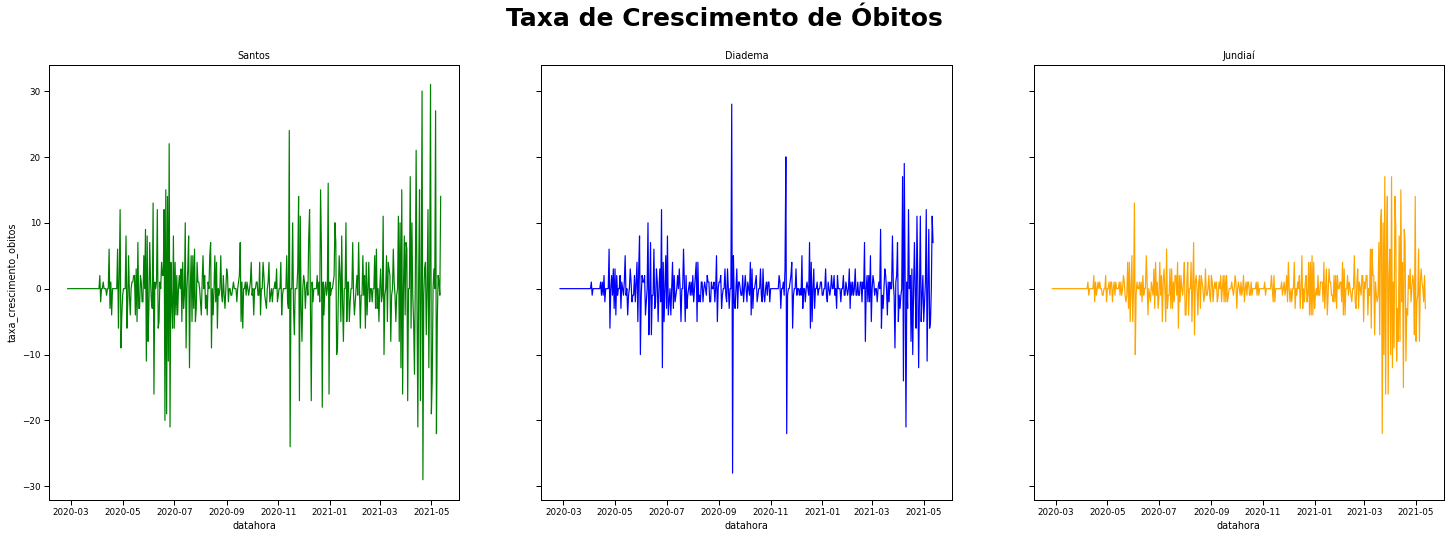

In [58]:
fig, ax = plt.subplots(ncols = 3,
                       sharey = True,
                       figsize = (25,8))

eixo = 0
fig.suptitle('Taxa de Crescimento de Óbitos',
             fontsize=25,
             fontweight = 'bold')

for i in lista_cidades:
    ax[eixo] = sns.lineplot(x = 'datahora',
                     y = 'taxa_crescimento_obitos',
                     ax = ax[eixo],
                     color = lista_cores[i],
                     data = dados_desafio[(dados_desafio['nome_munic'] == i)])
    ax[eixo].set_title(i)
    eixo = eixo + 1

A taxa de crescimento de óbitos apresenta uma variação maior no momento atual do que no início da pandemia. Jundiaí, nesse quesito, apresenta variações menores do que Diadema.

Santos sempre apresenta números maiores.

Chama a atenção alguns "*spikes*" nos números de Diadema, para ambos os lados (crescimento em um dia seguido de decréscimo no dia seguinte), o que parece significar retenção de notificações.

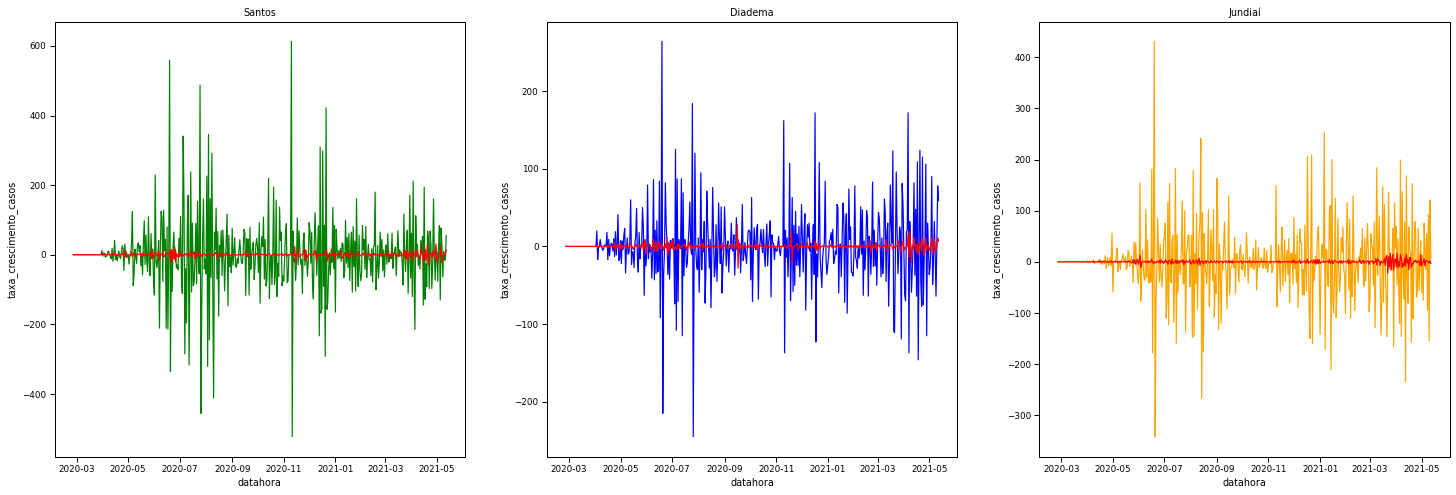

In [59]:
fig, ax = plt.subplots(ncols = 3,
#                       sharey = True,
                       figsize = (25,8))

eixo = 0
#fig.suptitle('Taxa de Crescimento de Casos Novos',
#             fontsize=25,
#             fontweight = 'bold')

for i in lista_cidades:
    ax[eixo] = sns.lineplot(x = 'datahora',
                     y = 'taxa_crescimento_casos',
                     ax = ax[eixo],
                     color = lista_cores[i],
                     data = dados_desafio[(dados_desafio['nome_munic'] == i)])
#    ax[eixo] = plt.twinx()
    ax[eixo] = sns.lineplot(x = 'datahora',
                     y = 'taxa_crescimento_obitos',
                     ax = ax[eixo],
                     color = 'red',
                     data = dados_desafio[(dados_desafio['nome_munic'] == i)])
    ax[eixo].set_title(i)
    eixo = eixo + 1

A exemplo do que vimos quando analisamos São Paulo Capital, os óbitos não parecem ter uma relação direta com o surgimento de casos novos.

Temos maior ocorrência de óbitos no final da série, possivelmente relacionados ao surgimento de variantes mais agressivas do vírus e não à quantidade de casos.

Vamos analisar as correlações dos casos novos com os óbitos deslocados para ver se alguma cidade vai apresentar valores maiores do que os 0,7355 apresentados por São Paulo Capital.

In [60]:
for x in lista_cidades:
    i_maior_correl = 0
    maior_correl = 0
    i_menor_correl = 0
    menor_correl = 0

    for i in list(range(0,int(dados_desafio[(dados_desafio['nome_munic'] == x)].shape[0]/2),1)):
        df_temp = pd.DataFrame()
        df_temp['casos'] = dados_desafio[(dados_desafio['nome_munic'] == x)]['casos_novos']
        df_temp['obitos_desloc'] = dados_desafio[(dados_desafio['nome_munic'] == x)]['obitos_novos'].shift(-i)
        df_temp.dropna(inplace=True)
        correl = np.corrcoef(df_temp['casos'],df_temp['obitos_desloc'])
        if correl[0,1] > maior_correl:
            maior_correl = correl[0,1]
            i_maior_correl = i
        elif correl[0,1] < menor_correl:
            menor_correl = correl[0,1]
            i_menor_correl = i
    print('\nCidade -->',x)
    print('Maior -->',i_maior_correl,' - ',maior_correl)
    print('Menor -->',i_menor_correl,' - ',menor_correl)



Cidade --> Santos
Maior --> 0  -  0.32699250667448626
Menor --> 89  -  -0.14903030970897563

Cidade --> Diadema
Maior --> 0  -  0.44848737319973014
Menor --> 74  -  -0.17046527534515318

Cidade --> Jundiaí
Maior --> 0  -  0.4922224168847251
Menor --> 157  -  -0.12374765719705093


As cidades escolhidas apresentaram correlações ainda mais fracas do que São Paulo Capital.

Só a título de curiosidade, vamos plotar os gráficos de correlação de casos novos e óbitos, sem deslocamento.

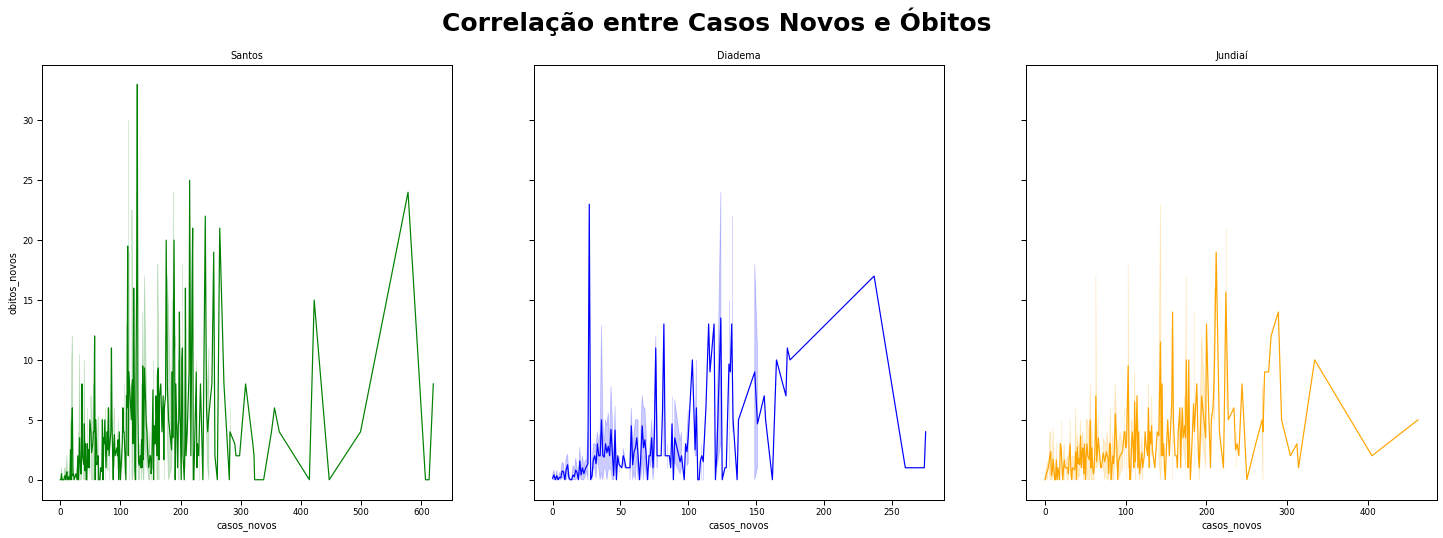

In [61]:
fig, ax = plt.subplots(ncols = 3,
                       sharey = True,
                       figsize = (25,8))

eixo = 0
fig.suptitle('Correlação entre Casos Novos e Óbitos',
             fontsize=25,
             fontweight = 'bold')

for i in lista_cidades:
    ax[eixo] = sns.lineplot(x = 'casos_novos',
                     y = 'obitos_novos',
                     ax = ax[eixo],
                     color = lista_cores[i],
                     data = dados_desafio[(dados_desafio['nome_munic'] == i)])
    ax[eixo].set_title(i)
    eixo = eixo + 1

Vamos verificar também se alguma das cidades apresentou indício de sazonalidade, pela autocorrelação da série de casos novos.

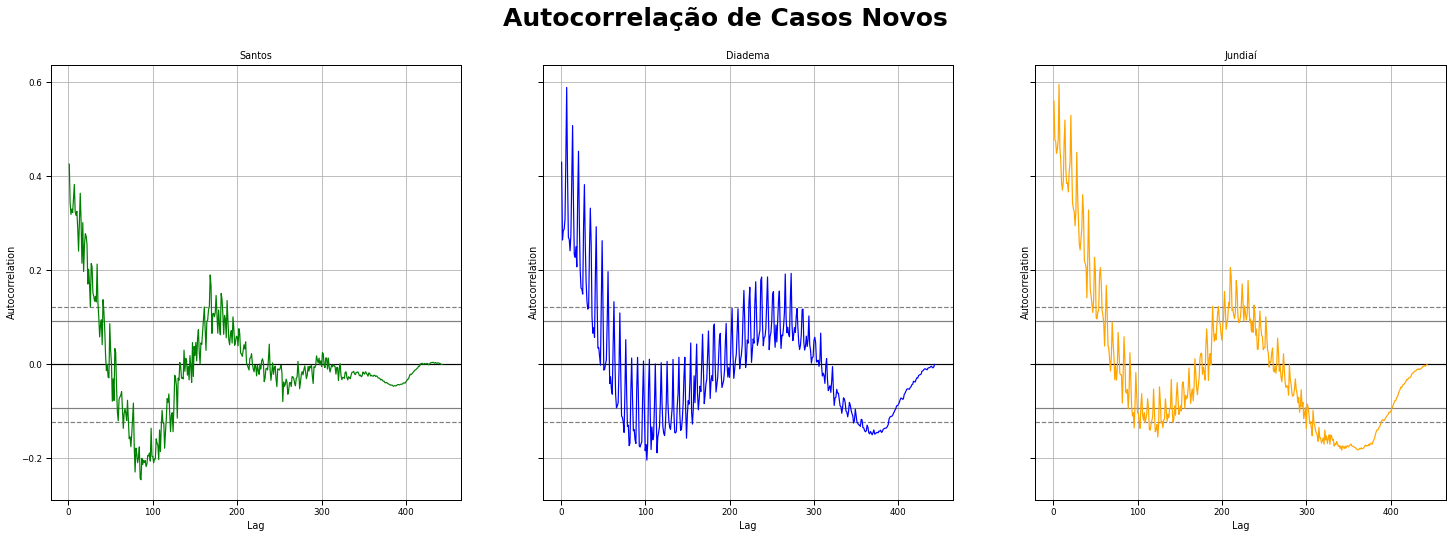

In [62]:
fig, ax = plt.subplots(ncols = 3,
                       sharey = True,
                       figsize = (25,8))

eixo = 0
fig.suptitle('Autocorrelação de Casos Novos',
             fontsize=25,
             fontweight = 'bold')

for i in lista_cidades:
    ax[eixo] = autocorrelation_plot(dados_desafio[(dados_desafio['nome_munic'] == i)]['casos_novos'],
                                    ax = ax[eixo],
                                    color = lista_cores[i])
    
    ax[eixo].set_title(i)
    eixo = eixo + 1

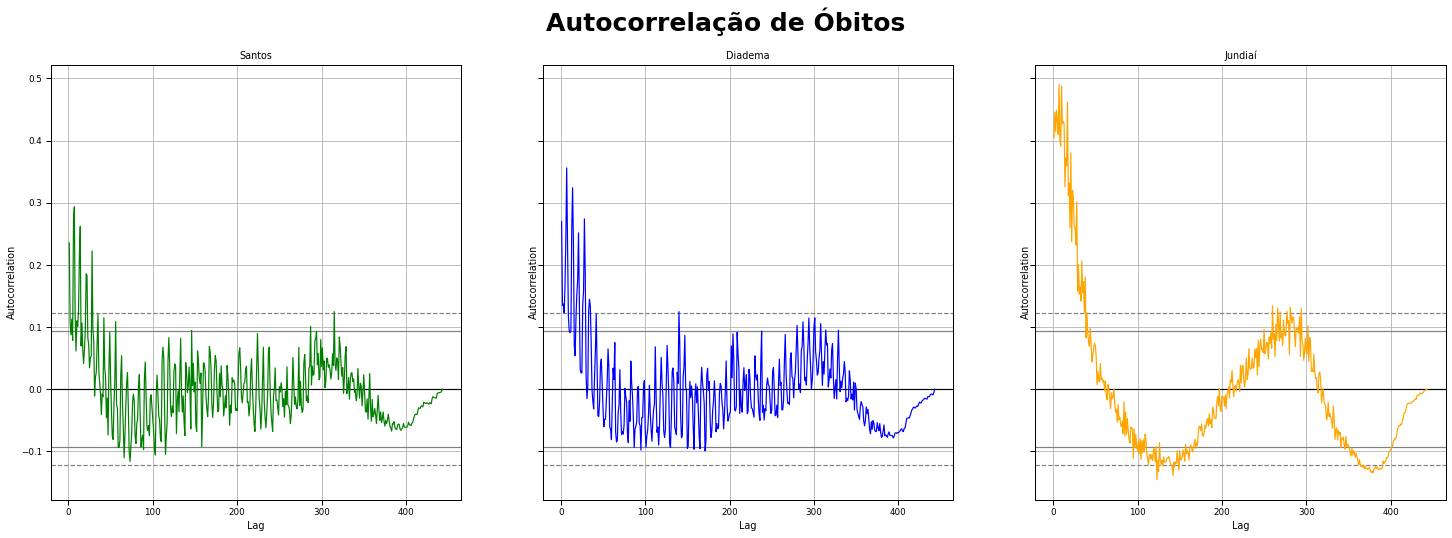

In [63]:
fig, ax = plt.subplots(ncols = 3,
                       sharey = True,
                       figsize = (25,8))

eixo = 0
fig.suptitle('Autocorrelação de Óbitos',
             fontsize=25,
             fontweight = 'bold')

for i in lista_cidades:
    ax[eixo] = autocorrelation_plot(dados_desafio[(dados_desafio['nome_munic'] == i)]['obitos_novos'],
                                    ax = ax[eixo],
                                    color = lista_cores[i])
    
    ax[eixo].set_title(i)
    eixo = eixo + 1

A exemplo de São Paulo, não podemos verificar nenhum tipo de sazonalidade significativa.

Vamos verificar a autocorrelação da série de óbitos.

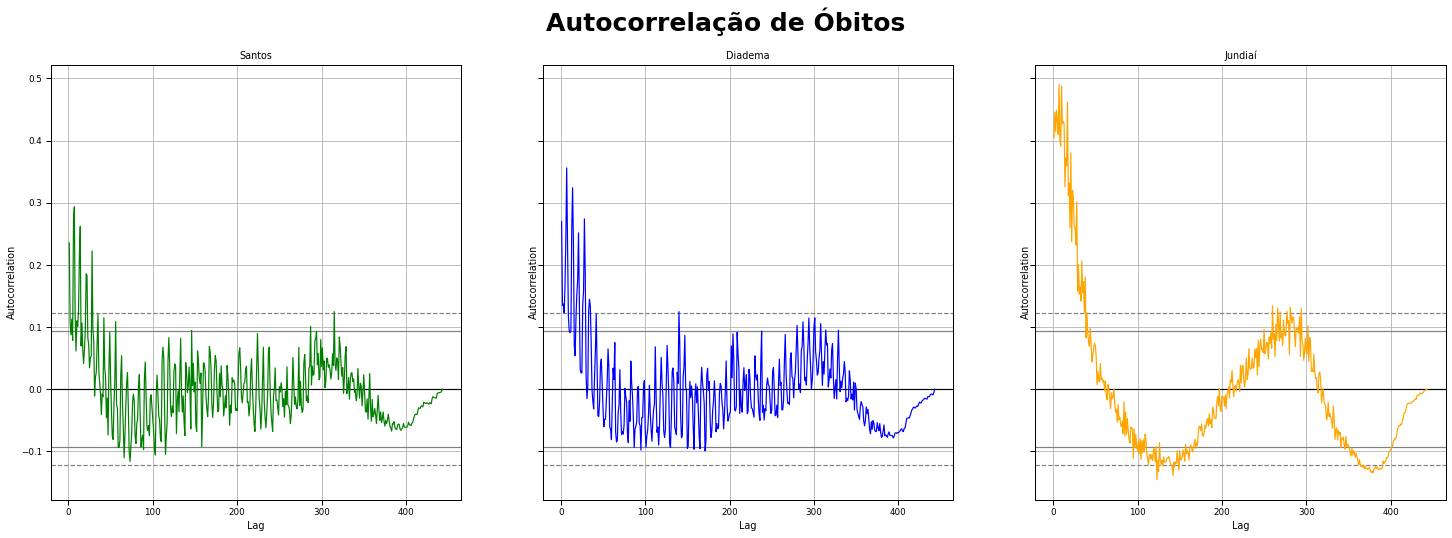

In [64]:
fig, ax = plt.subplots(ncols = 3,
                       sharey = True,
                       figsize = (25,8))

eixo = 0
fig.suptitle('Autocorrelação de Óbitos',
             fontsize=25,
             fontweight = 'bold')

for i in lista_cidades:
    ax[eixo] = autocorrelation_plot(dados_desafio[(dados_desafio['nome_munic'] == i)]['obitos_novos'],
                                    ax = ax[eixo],
                                    color = lista_cores[i])
    
    ax[eixo].set_title(i)
    eixo = eixo + 1

As cidades escolhidas também não apresentaram sinais de sazonalidade em relação à série de óbitos.

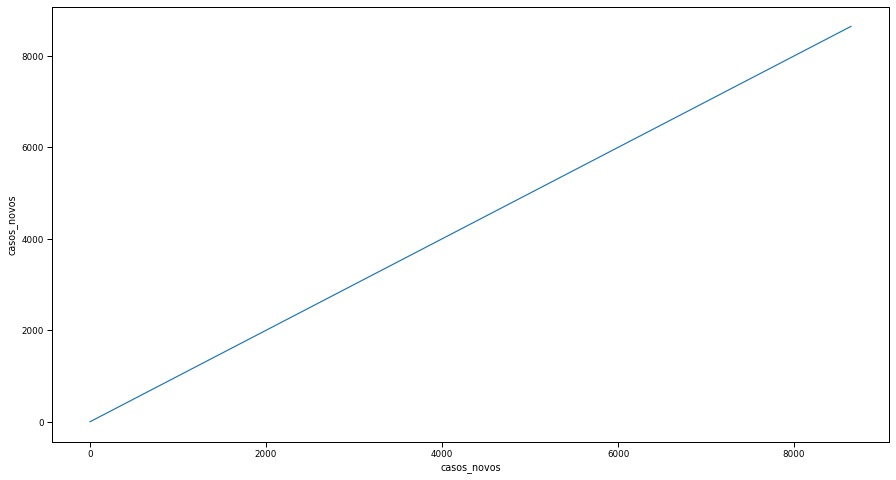

In [65]:
sns.lineplot(x='casos_novos', y='casos_novos', data=dados_sp)

Correlação perfeita, pois esta positiva.

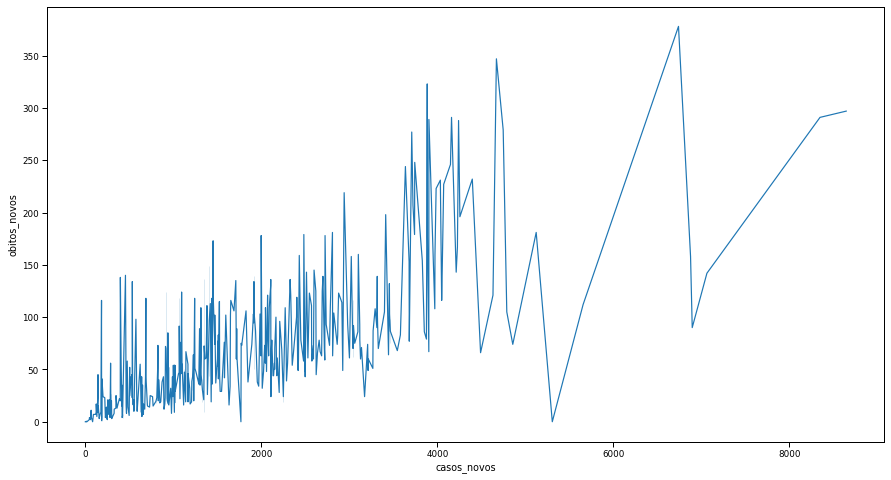

In [66]:
sns.lineplot(x='casos_novos', y='obitos_novos', data=dados_sp)

In [67]:
dados_202101 = dados_sp.query('mes==1 & ano==2021')
dados_202102 = dados_sp.query('mes==2 & ano==2021')

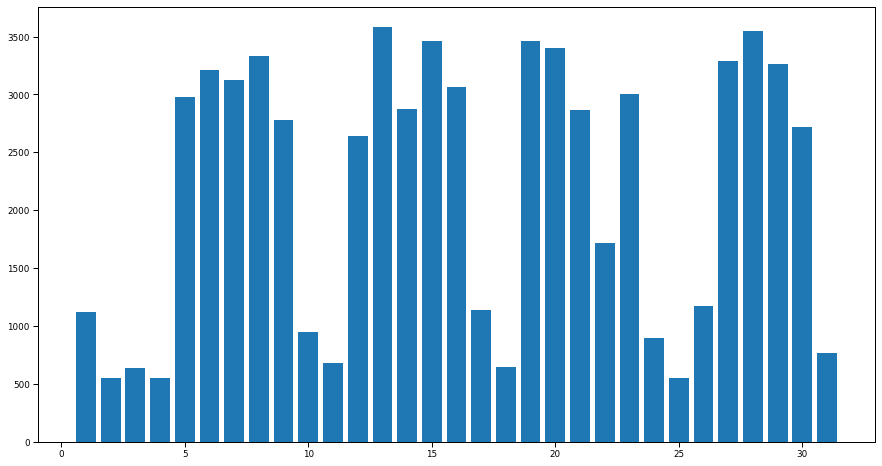

<BarContainer object of 28 artists>

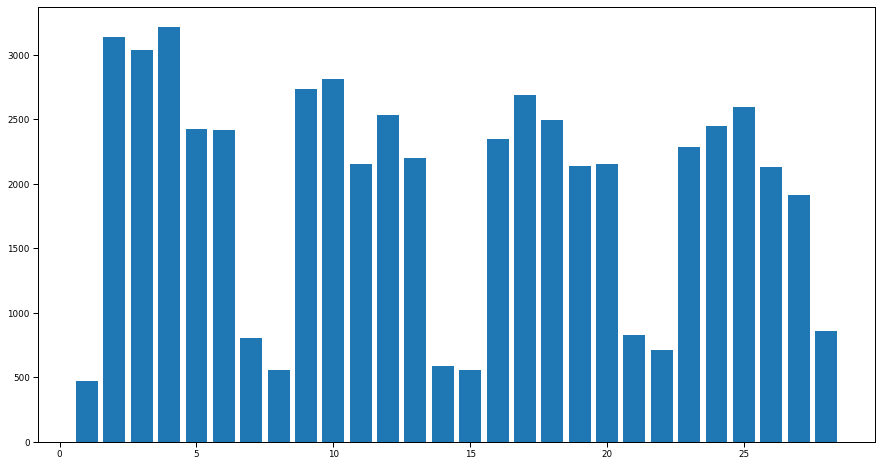

In [68]:
plt.bar(np.linspace(1, 31, 31), dados_202101['casos_novos'])
plt.show()
plt.bar(np.linspace(1, 28, 28), dados_202102['casos_novos'])

In [69]:
from pandas.plotting import autocorrelation_plot

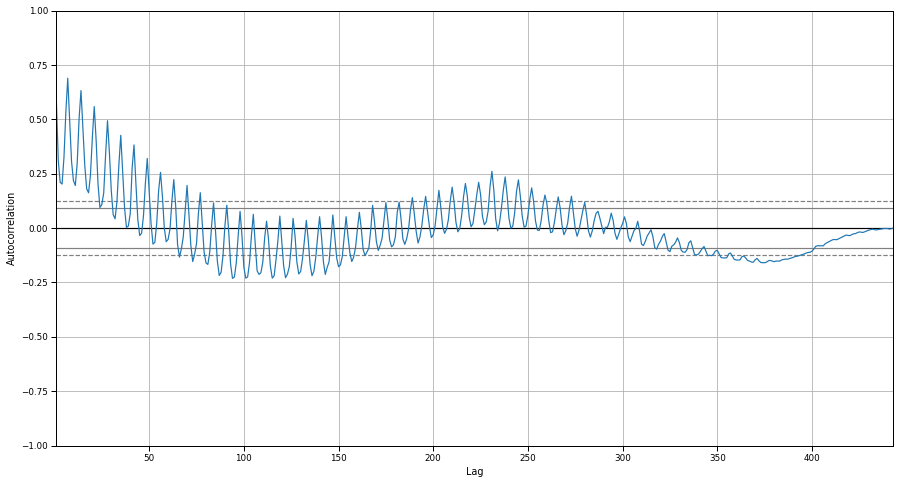

In [70]:
autocorrelation_plot(dados_sp['casos_novos'])

In [71]:
dados_sp.shape

(443, 38)

In [72]:
aleatorio = np.random.rand(443)

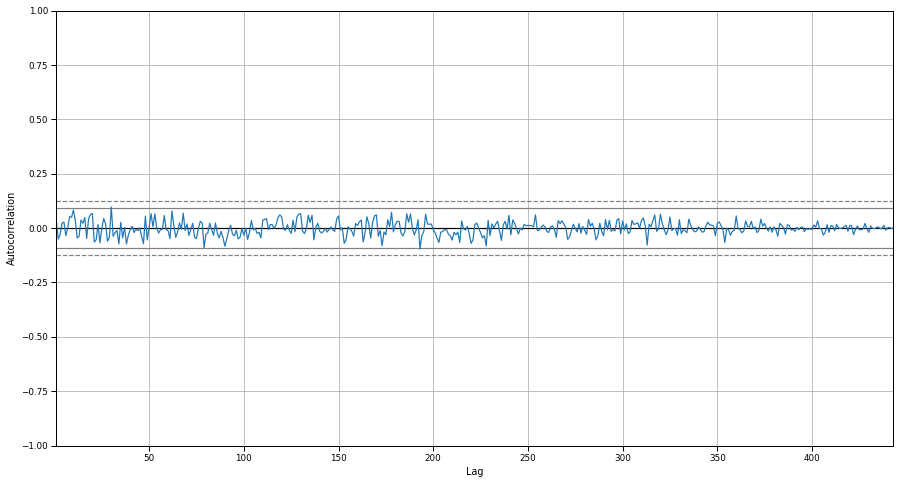

In [73]:
autocorrelation_plot(aleatorio)

# Aula 2.3

In [74]:
df = pd.DataFrame()

In [75]:
df['ds'] = dados_sp['datahora'][:400]

In [76]:
df['y'] = dados_sp['casos_novos'][:400]

In [77]:
dados_sp.shape

(443, 38)

In [78]:
df

ds     y
562    2020-02-25     0
1207   2020-02-26     0
1852   2020-02-27     0
2497   2020-02-28     1
3142   2020-02-29     0
...           ...   ...
255337 2021-03-26  4241
255982 2021-03-27  3709
256627 2021-03-28  2010
257272 2021-03-29  1242
257917 2021-03-30  4748

[400 rows x 2 columns]

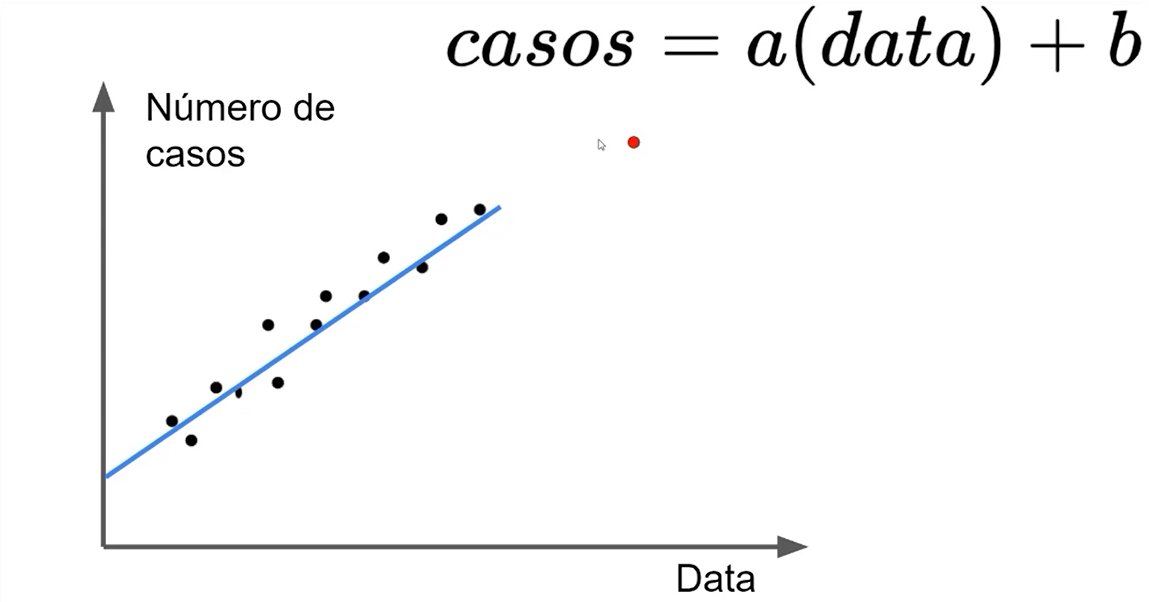

In [79]:
from fbprophet import Prophet

In [80]:
modelo = Prophet()

In [81]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [82]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [83]:
dataframefuturo.head()

ds
0 2020-02-25
1 2020-02-26
2 2020-02-27
3 2020-02-28
4 2020-02-29

In [84]:
previsao = modelo.predict(dataframefuturo)

In [85]:
previsao.head()

ds       trend  ...  multiplicative_terms_upper        yhat
0 2020-02-25 -137.621348  ...                         0.0  320.078004
1 2020-02-26 -119.843618  ...                         0.0  337.016324
2 2020-02-27 -102.065887  ...                         0.0  494.014021
3 2020-02-28  -84.288157  ...                         0.0  256.493471
4 2020-02-29  -66.510426  ...                         0.0   -7.395631

[5 rows x 16 columns]

In [86]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][400:]
df_teste['y'] = dados_sp['casos_novos'][400:]

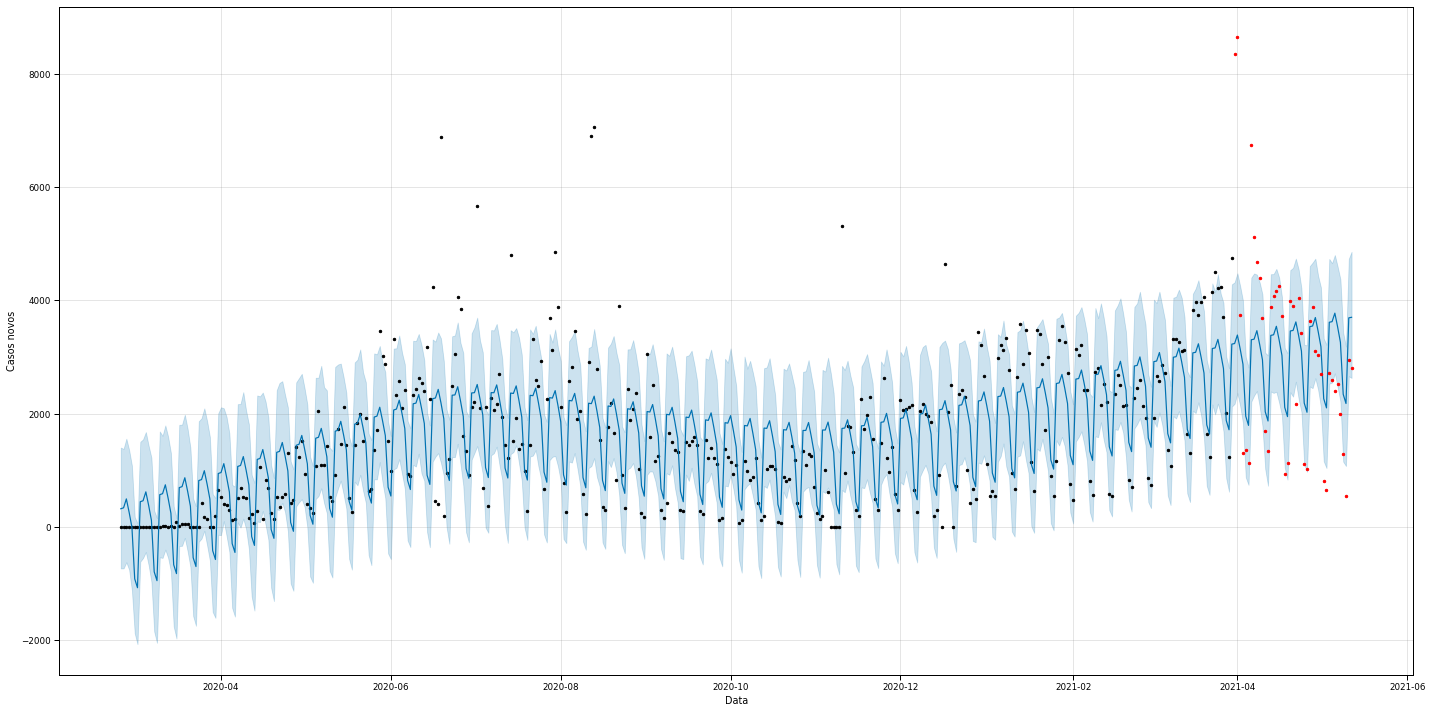

In [87]:
modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(20,10));
plt.plot(df_teste['ds'], df_teste['y'], '.r' )

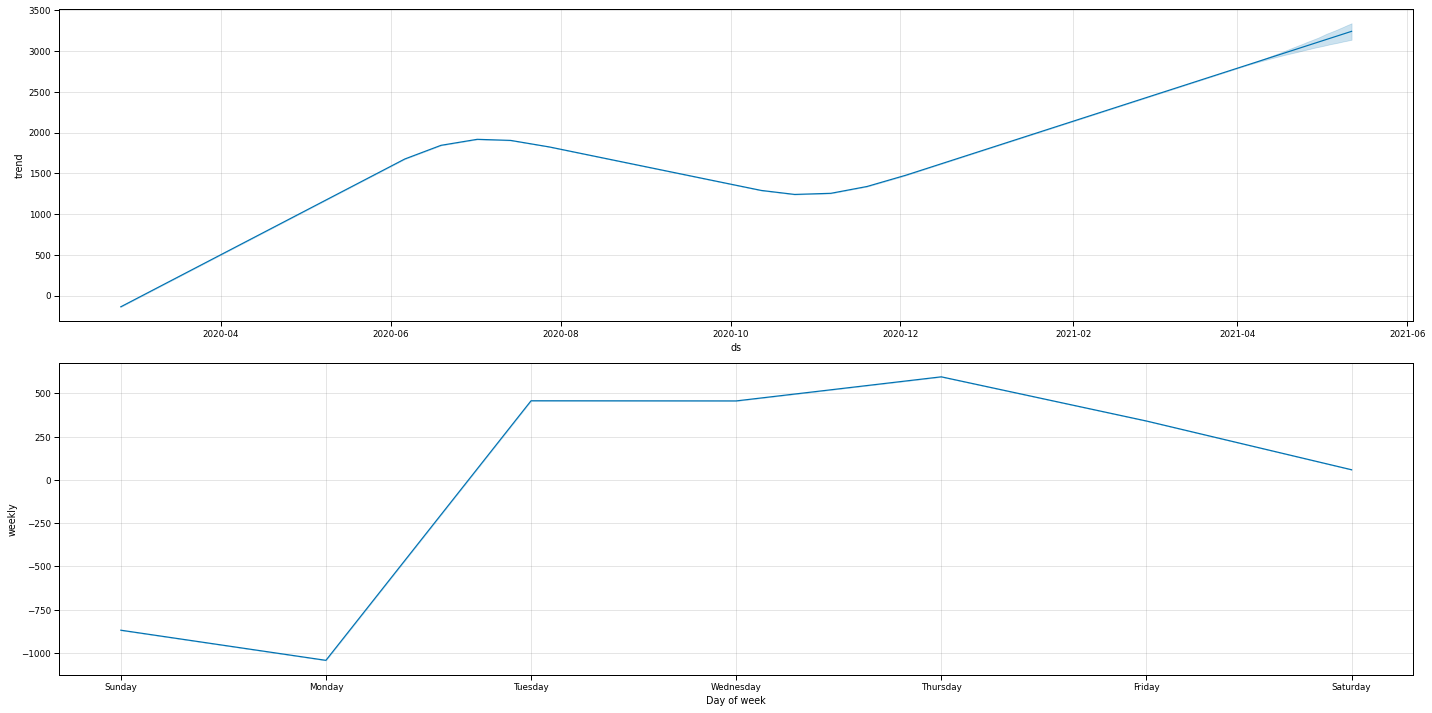

In [88]:
modelo.plot_components(previsao, figsize=(20,10));

Sazionalidade semanal

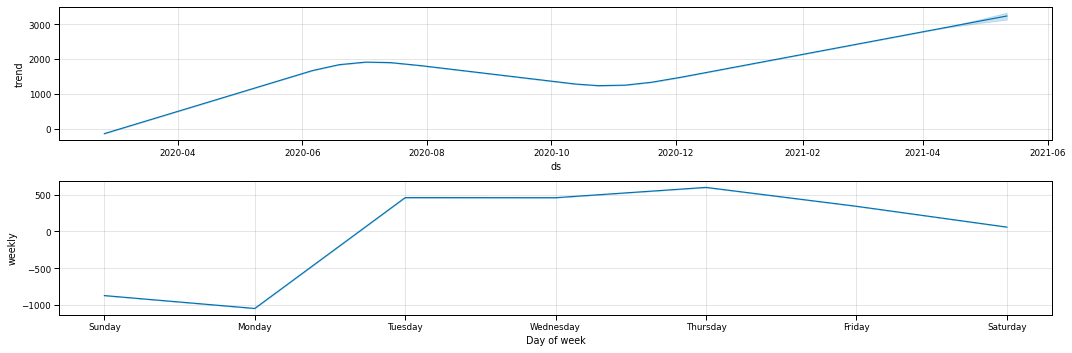

In [89]:
modelo.plot_components(previsao, figsize=(15,5));

## Desafio 08: Mudar os períodos de previsão

In [90]:
def projecao(dias: int):
    df_desafio = pd.DataFrame()
    df_desafio['ds'] = dados_sp['datahora'][:(dados_sp.shape[0] - dias)]
    df_desafio['y'] = dados_sp['casos_novos'][:(dados_sp.shape[0] - dias)]
    modelo_desafio = Prophet()
    modelo_desafio.fit(df_desafio)
    df_desafio_futuro = modelo_desafio.make_future_dataframe(periods = dias)
    prev_desafio = modelo_desafio.predict(df_desafio_futuro)
    df_desafio_teste = pd.DataFrame()
    df_desafio_teste['ds'] = dados_sp['datahora'][(dados_sp.shape[0] - dias):]
    df_desafio_teste['y'] = dados_sp['casos_novos'][(dados_sp.shape[0] - dias):]
    modelo_desafio.plot(prev_desafio,
                        xlabel = 'Data',
                        ylabel = 'Casos Novos',
                        figsize = (15,10));
    plt.plot(df_desafio_teste['ds'],
             df_desafio_teste['y'],
             '.r')
#    modelo_desafio.plot_components(prev_desafio)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


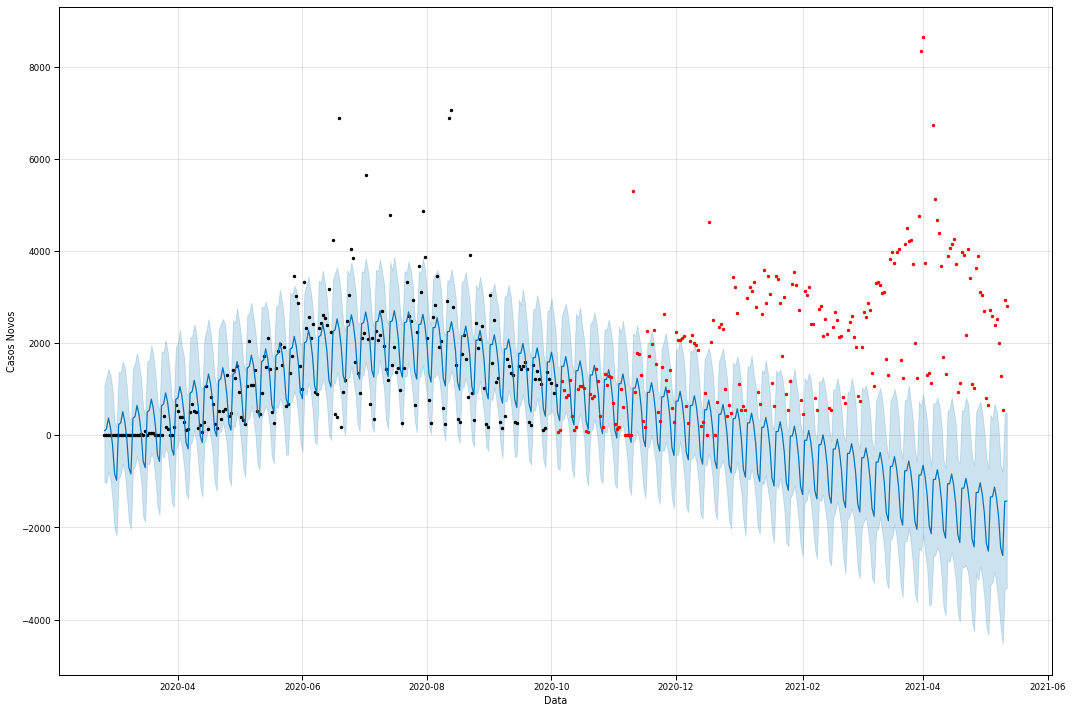

In [91]:
teste_50 = int(dados_sp.shape[0]*.50)
projecao(teste_50)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


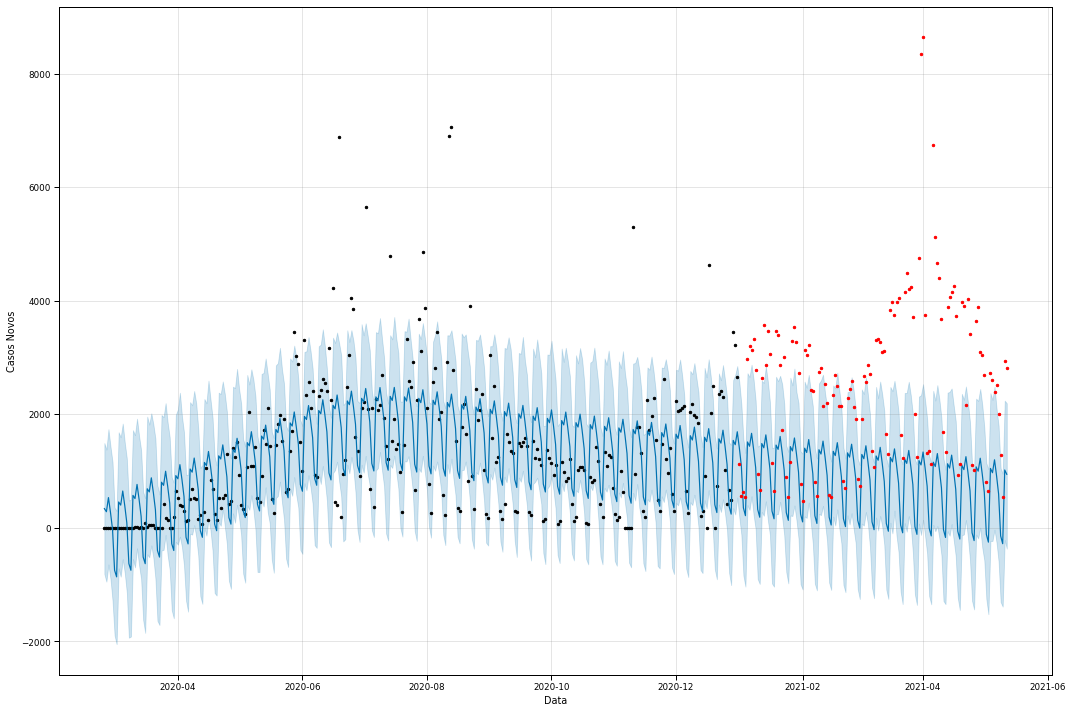

In [92]:
regra_70_30 = int(dados_sp.shape[0]*.30)
projecao(regra_70_30)

## Desafio 09: Explorar a documentação do Prophet

Temos o *Quick Start* [aqui](https://facebook.github.io/prophet/docs/quick_start.html#python-api), onde podemos ver que os passos iniciais são muito semelhantes ao que aplicamos nesta aula.

Achei muito interessante a possibilidade de usar bibliotecas adicionais para gerar gráficos interativos, que nos permitem analisar melhor pontos específicos dos gráficos.

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(modelo, previsao)

In [ ]:
plot_components_plotly(modelo, previsao)

## Desafio 10: Deixar os gráficos mais bonitos

In [ ]:
grafico = modelo.plot(previsao, figsize=(15,10));
plt.plot(df_teste['ds'],df_teste['y'], '*r', markersize = 8)
plt.title('COVID-19: Modelo de Previsão do Prophet para São Paulo Capital com 400 dias de Treino',
          fontsize = 25,
          fontweight = 'bold')
plt.legend(labels=['Dados de Treino','Curva Projetada','Dados de Teste','Intervalo de Confiança'],
           fontsize = 15)
eixo = grafico.get_axes()
eixo[0].set_xlabel('Data', fontsize=18, fontweight='bold')
eixo[0].set_ylabel('Casos Novos', fontsize=18, fontweight='bold')
eixo[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [ ]:
grafico = modelo.plot_components(previsao,figsize=(15,10));
eixos = grafico.get_axes()
eixos[0].set_title('Tendência Identificada pelo Modelo',
                   fontsize = 20,
                   fontweight = 'bold')
eixos[0].set_ylabel('Casos Novos',fontsize=18,fontweight='bold')
eixos[0].set_xlabel('Período',fontsize=18,fontweight='bold')
eixos[1].set_title('Sazonalidade Semanal',
                   fontsize = 20,
                   fontweight = 'bold')
eixos[1].set_ylabel('Variação de Casos Novos',fontsize=18,fontweight='bold')
eixos[1].set_xlabel('Dia da Semana',fontsize=18,fontweight='bold')
eixos[1].set_xticklabels(["Domingo", "Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado"])
eixos[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.subplots_adjust(hspace=0.3)
plt.show()

#Aula 3.3

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

In [ ]:
fig = modelo.plot(previsao, figsize=(15, 10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [ ]:
modelo = Prophet(n_changepoints=50)

In [ ]:
modelo.fit(df)

In [ ]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [ ]:
previsao = modelo.predict(dataframefuturo)

In [ ]:
fig = modelo.plot(previsao, figsize=(15, 10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [ ]:
modelo = Prophet(n_changepoints=25, changepoint_prior_scale=10.0)

In [ ]:
modelo.fit(df)

In [ ]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [ ]:
previsao = modelo.predict(dataframefuturo)

In [ ]:
fig = modelo.plot(previsao, figsize=(15, 10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [ ]:
modelo = Prophet(n_changepoints=25, changepoint_prior_scale=0.0005)

In [ ]:
modelo.fit(df)

In [ ]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [ ]:
previsao = modelo.predict(dataframefuturo)

In [ ]:
fig = modelo.plot(previsao, figsize=(15, 10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [ ]:
modelo = Prophet(changepoints=['2020-12-31'])

In [ ]:
modelo.fit(df)

In [ ]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [ ]:
previsao = modelo.predict(dataframefuturo)

In [ ]:
fig = modelo.plot(previsao, figsize=(15, 10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

## Desafio 01: Fazer todo o processo de previsão para o número de dados acumulados.

**Desafio - Fazer a Previsão para os Casos Acumulados com Crescimento Logístico**

Usar o parâmetro **```growth = 'logistic'```** na criação do modelo do **Prophet**.

O uso desse parâmetro demanda a inclusão de outras duas colunas em nossos *DataFrames* (de treino e de projeção). São elas:
* **```cap```** - é o teto que a nossa projeção pode alcançar. A população total, por exemplo. Em uma cidade de 100 mil habitantes não faz sentido ter um modelo que preveja 150 mil casos. Esse parâmetro é obrigatório e pode variar ao longo da Série Temporal (prevendo um crescimento da população, por exemplo.
* **```floor```** - é o mínimo que a projeção pode alcançar, caso aponte uma tendência de queda. Não podemos ter casos negativos, por exemplo. Esse parâmetro é opcional.

In [ ]:
dias = regra_70_30
df_desafio_log = pd.DataFrame()
df_desafio_log['ds'] = dados_sp['datahora'][:(dados_sp.shape[0] - dias)]
df_desafio_log['y'] = dados_sp['casos'][:(dados_sp.shape[0] - dias)]
df_desafio_log['cap'] = 1000000
df_desafio_log['floor'] = 0
modelo_desafio_log = Prophet(growth = 'logistic')
modelo_desafio_log.fit(df_desafio_log)
df_desafio_log_futuro = modelo_desafio_log.make_future_dataframe(periods = dias)
df_desafio_log_futuro['cap'] = 1000000
df_desafio_log_futuro['floor'] = 0
prev_desafio_log = modelo_desafio_log.predict(df_desafio_log_futuro)
df_desafio_log_teste = pd.DataFrame()
df_desafio_log_teste['ds'] = dados_sp['datahora'][(dados_sp.shape[0] - dias):]
df_desafio_log_teste['y'] = dados_sp['casos'][(dados_sp.shape[0] - dias):]
modelo_desafio_log.plot(prev_desafio_log,
                    xlabel = 'Data',
                    ylabel = 'Casos Totais',
                    figsize = (15,10));
plt.plot(df_desafio_log_teste['ds'],
            df_desafio_log_teste['y'],
            '.r')
modelo_desafio_log.plot_components(prev_desafio_log,figsize=(15,10));

Fazendo a projeção de casos totais com o modelo logístico, apesar de ainda termos uma realidade superior ao projetado, já temos o realizado (dados de teste) dentro do intervalo de confiança projetado pelo modelo, apesar de estar bem dentro do limite superior.

Testei usando **```cap```** diferentes, desde 900k até 2 MM e vi que a principal variação no modelo resultante é o alargamento do intervalo de confiança. Deixei no notebook a versão usando a separação dos dados em 70% / 30% com 1 MM de **```cap```**;

Para isso vou adaptar a função que foi criada no desafio anterior para realizar todos os passos usando a coluna 'Casos".

In [ ]:
def proj_casos(dias: int):
    df_desafio_02 = pd.DataFrame()
    df_desafio_02['ds'] = dados_sp['datahora'][:(dados_sp.shape[0] - dias)]
    df_desafio_02['y'] = dados_sp['casos'][:(dados_sp.shape[0] - dias)]
    modelo_desafio_02 = Prophet()
    modelo_desafio_02.fit(df_desafio_02)
    df_desafio_02_futuro = modelo_desafio_02.make_future_dataframe(periods = dias)
    prev_desafio_02 = modelo_desafio_02.predict(df_desafio_02_futuro)
    df_desafio_02_teste = pd.DataFrame()
    df_desafio_02_teste['ds'] = dados_sp['datahora'][(dados_sp.shape[0] - dias):]
    df_desafio_02_teste['y'] = dados_sp['casos'][(dados_sp.shape[0] - dias):]
    modelo_desafio_02.plot(prev_desafio_02,
                        xlabel = 'Data',
                        ylabel = 'Casos Totais',
                        figsize = (15,10));
    plt.plot(df_desafio_02_teste['ds'],
             df_desafio_02_teste['y'],
             '.r')
    modelo_desafio_02.plot_components(prev_desafio_02,figsize=(15,10))

In [ ]:
proj_casos(regra_70_30)

O que achei mais interessante nesse gráfico da projeção de casos totais é como a curva projetada se desprende dos dados reais, enquanto a projeção de casos novos não parecia estar tão divergente assim.

## Desafio 02: Identificar potenciais changepoints

**Desafio - Usando o** **```diff()```,** **Identificar Possíveis** ***Changepoints***

Usar o gráfico de barras e tentar identificar sequência de barras que indiquem mudanças de tendência ou critérios para isso e comparar com os *changepoints* identificados pelo **Prophet**.

In [ ]:
dados_sp['Semana'] = pd.DatetimeIndex(dados_sp['datahora']).week

plt.bar(dados_sp.groupby(by=dados_sp['Semana']).sum().index,dados_sp.groupby(by=dados_sp['Semana']).sum()['taxa_crescimento_casos'])
plt.hlines(y=0,xmin=0, xmax=55, colors='r')

Como podemos ver no gráfico de barras da taxa de crescimento de casos agrupada por semana, não chegamos a ter nenhuma sequência de mais de 4 semanas com a taxa de crescimento positiva ou negativa, sendo que o mais comum é a alternância de semanas positivas com semanas negativas.

Isso provavelmente ocorre pela falta de notificação imediata dos casos, acumulando notificações e deixando a informação de surgimento de um caso novo desencontrada com a realidade.

Dessa forma, o gráfico de barras não é uma boa maneira de identificar *changepoints* nessa série de dados.

## Desafio 03: Desenvolver uma função roda o modelo 

Esse ponto já foi feito anteriormente, vou verificar se tem algo para melhorar na função em termos de passagem de parâmetros, por exemplo.

In [ ]:
def profeta(df_func, var_func: str, dias: int):
    df_desafio = pd.DataFrame()
    df_desafio['ds'] = df_func['datahora'][:(df_func.shape[0] - dias)]
    df_desafio['y'] = df_func[var_func][:(df_func.shape[0] - dias)]
    modelo_desafio = Prophet()
    modelo_desafio.fit(df_desafio)
    df_desafio_futuro = modelo_desafio.make_future_dataframe(periods = dias)
    prev_desafio = modelo_desafio.predict(df_desafio_futuro)
    df_desafio_teste = pd.DataFrame()
    df_desafio_teste['ds'] = df_func['datahora'][(df_func.shape[0] - dias):]
    df_desafio_teste['y'] = df_func[var_func][(df_func.shape[0] - dias):]
    graf_func = modelo_desafio.plot(prev_desafio,
                        xlabel = 'Data',
                        ylabel = var_func,
                        figsize = (15,10));
    graf_func2 = plt.plot(df_desafio_teste['ds'],
             df_desafio_teste['y'],
             '.r')
    graf_func3 = modelo_desafio.plot_components(prev_desafio)
    return graf_func, graf_func2, graf_func3

In [ ]:
graf, graf2, graf3 = profeta(dados_sp, 'casos_novos', regra_70_30)

#Aula 4.3


In [ ]:
modelo = Prophet(changepoint_prior_scale=10)

In [ ]:
modelo.add_country_holidays(country_name='BR')

In [ ]:
modelo.fit(df)

In [ ]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [ ]:
previsao = modelo.predict(dataframefuturo)

In [ ]:
fig = modelo.plot(previsao, figsize=(15, 10))

In [ ]:
feriados_sp_2020= [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21',
'2020-05-22',
'2020-05-25',
'2020-06-11',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

feriados_sp_2021= [
'2020-01-01',
'2020-01-25',
'2020-02-15',
'2020-02-16',
'2020-02-17',
'2020-03-26',
'2020-03-29',
'2020-03-30',
'2020-03-31',
'2020-04-01',
'2020-04-02',
'2020-4-21',
'2020-05-01'
]

In [ ]:
feriados_sp_2020 = pd.DataFrame({'holiday': 'sp_2020', 'ds':pd.to_datetime(feriados_sp_2020)})

In [ ]:
feriados_sp_2021 = pd.DataFrame({'holiday': 'sp_2021', 'ds':pd.to_datetime(feriados_sp_2021)})

In [ ]:
feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))

In [ ]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays=feriados)

In [ ]:
modelo_feriados.fit(df)

In [ ]:
dataframefuturo = modelo_feriados.make_future_dataframe(periods=43)

In [ ]:
previsao = modelo_feriados.predict(dataframefuturo)

In [ ]:
fig = modelo.plot(previsao, figsize=(15, 10))

In [ ]:
modelo_feriados.plot_components(previsao, figsize=(15,10));

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
# Sazonalidade aditiva
mean_absolute_error(df['y'], previsao['yhat'][:400])

In [ ]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays=feriados, seasonality_mode='multiplicative')

In [ ]:
modelo_feriados.fit(df)

In [ ]:
dataframefuturo = modelo_feriados.make_future_dataframe(periods=43)

In [ ]:
previsao = modelo_feriados.predict(dataframefuturo)

In [ ]:
fig = modelo.plot(previsao, figsize=(15, 10))

In [ ]:
fig = modelo.plot(previsao, figsize=(20,10));
plt.plot(df_teste['ds'],df_teste['y'],'.r')

In [ ]:
modelo_feriados.plot_components(previsao, figsize=(15,10));

In [ ]:
# Sazonalidade multiplicativa
mean_absolute_error(df['y'], previsao['yhat'][:400])

## Desafio Extra: Utilizar outras métricas do Scikitlearn e comparar os resultados.

Para fazer essas comparações, vamos trabalhar com 4 modelos:
* Modelo Aditivo, usando 400 dias de Treino
* Modelo Multiplicativo, usando 400 dias de Treino
* Modelo Aditivo, usando 70% dos dados para Treino e 30% para Teste
* Modelo Multiplicativo, usando 70% dos dados para Treino e 30% para Teste

Vamos importar algumas funções da biblioteca **```sklearn```** para calcular os diferentes indicadores e comparar os resultados.

In [ ]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

#from sklearn.metrics import mean_absolute_percentage_error ## só está disponível no sklearn 0.24 em diante, Colab roda versão 0.22.2. post1

Usando a função **```profeta_v2```** criada anteriormente, vamos rodar os 4 modelos, preservando apenas os *DataFrames* que serão necessários para calcular os indicadores.

In [ ]:
graf, graf2, graf3, graf4, graf5, df_adit, prev_adit = profeta_v2(dados_sp, 'casos_novos', 78)
graf, graf2, graf3, graf4, graf5, df_mult, prev_mult = profeta_v2(dados_sp, 'casos_novos', 78, 'multiplicative')

graf, graf2, graf3, graf4, graf5, df_adit_7030, prev_adit_7030 = profeta_v2(dados_sp, 'casos_novos', regra_70_30)
graf, graf2, graf3, graf4, graf5, df_mult_7030, prev_mult_7030 = profeta_v2(dados_sp, 'casos_novos', regra_70_30, 'multiplicative')

In [ ]:
# explained_variance_score mede a dispersão de um dataset em comparação com a previsão modelada
# O melhor resultado possível é 1 e quanto menor o valor, pior o resultado

print('\033[1m','Explained Variance Score', '\033[0m')
print('Modelo Aditivo, 400 dias de Treino       :',
      explained_variance_score(y_true = df_adit.y, y_pred=prev_adit.yhat[:(len(df_adit))]))
print('Modelo Multiplicativo, 400 dias de Treino:',
      explained_variance_score(y_true = df_mult.y, y_pred=prev_mult.yhat[:(len(df_mult))]))
print('Modelo Aditivo, Regra 70% - 30%          :',
      explained_variance_score(y_true = df_adit_7030.y, y_pred=prev_adit_7030.yhat[:(len(df_adit_7030))]))
print('Modelo Multiplicativo, Regra 70% - 30%   :',
      explained_variance_score(y_true = df_mult_7030.y, y_pred=prev_mult_7030.yhat[:len(df_mult_7030)]))

Melhor Resultado Obtido = Modelo Multiplicativo com 400 dias de Treino

In [ ]:
# mean_absolute_error é a média das diferenças (em valores absolutos) entre o previsto pelo modelo e o real
# Quanto mais perto de zero, melhor, é sempre positivo.

print('\033[1m','Erro Médio Absoluto', '\033[0m')
print('Modelo Aditivo, 400 dias de Treino       :',
      mean_absolute_error(y_true = df_adit.y, y_pred=prev_adit.yhat[:(len(df_adit))]))
print('Modelo Multiplicativo, 400 dias de Treino:',
      mean_absolute_error(y_true = df_mult.y, y_pred=prev_mult.yhat[:(len(df_mult))]))
print('Modelo Aditivo, Regra 70% - 30%          :',
      mean_absolute_error(y_true = df_adit_7030.y, y_pred=prev_adit_7030.yhat[:(len(df_adit_7030))]))
print('Modelo Multiplicativo, Regra 70% - 30%   :',
      mean_absolute_error(y_true = df_mult_7030.y, y_pred=prev_mult_7030.yhat[:len(df_mult_7030)]))

Melhor Resultado Obtido = Modelo Multiplicativo com 70% dos dados para Treino e 30% para Teste

In [ ]:
# mean_squared_error faz a média dos erros entre o previsto pelo modelo e o real elevados ao quadrado
# Isso potencializa erros maiores, mas deixa a unidade de medida do erro elevada ao quadrado
# Quanto mais perto de zero, melhor, é sempre positivo.

print('\033[1m','Erro Médio Absoluto ao Quadrado', '\033[0m')
print('Modelo Aditivo, 400 dias de Treino       :',
      mean_squared_error(y_true = df_adit.y, y_pred=prev_adit.yhat[:(len(df_adit))]))
print('Modelo Multiplicativo, 400 dias de Treino:',
      mean_squared_error(y_true = df_mult.y, y_pred=prev_mult.yhat[:(len(df_mult))]))
print('Modelo Aditivo, Regra 70% - 30%          :',
      mean_squared_error(y_true = df_adit_7030.y, y_pred=prev_adit_7030.yhat[:(len(df_adit_7030))]))
print('Modelo Multiplicativo, Regra 70% - 30%   :',
      mean_squared_error(y_true = df_mult_7030.y, y_pred=prev_mult_7030.yhat[:len(df_mult_7030)]))

Melhor Resultado Obtido = Modelo Multiplicativo com 400 dias de Treino

In [ ]:
# mean_squared_log_error usa a função logarítmica sobre a diferença entre o previsto e o realizado
# É uma  métrica adequada para séries com crescimento exponencial
# O score penaliza mais previsões abaixo do real do que previsões acima do real
# Não funciona com números negativos e temos yhat negativos no início de nossa série
# Por isso alterei o trecho da série de dados que vai ser avaliado

print('\033[1m','Erro Médio Logarítmico ao Quadrado', '\033[0m')
print('Modelo Aditivo, 400 dias de Treino       :','Não Aplicável - Previsão Negativa')
      #mean_squared_log_error(y_true = df_adit.y[10:], y_pred=prev_adit.yhat[10:(len(df_adit))]))
print('Modelo Multiplicativo, 400 dias de Treino:',
      mean_squared_log_error(y_true = df_mult.y[10:], y_pred=prev_mult.yhat[10:(len(df_mult))]))
print('Modelo Aditivo, Regra 70% - 30%          :','Não Aplicável - Previsão Negativa')
      #mean_squared_log_error(y_true = df_adit_7030.y[10:], y_pred=prev_adit_7030.yhat[10:(len(df_adit_7030))]))
print('Modelo Multiplicativo, Regra 70% - 30%   :',
      mean_squared_log_error(y_true = df_mult_7030.y[10:], y_pred=prev_mult_7030.yhat[10:len(df_mult_7030)]))

Melhor Resultado Obtido = Modelo Multiplicativo com 400 dias de Treino

In [ ]:
# mean_absolute_percentage_error calcula a média dos percentuais de erros (em valores absolutos)
# É interessante por "normalizar" as diferenças, deixando melhor que o erro absoluto
# Não está disponível na versão do sklearn do Colab

#mean_absolute_percentage_error(y_true = df['y'], y_pred=prev['yhat'][:400])

In [ ]:
# median_absolute_error calcula a mediana dos valores de erros absolutos
# É interessante por ser uma opção mais robusta à presença de outliers na série de dados
# Quanto mais perto de zero, melhor, é sempre positivo.

print('\033[1m','Mediana dos Erros Absolutos', '\033[0m')
print('Modelo Aditivo, 400 dias de Treino       :',
      median_absolute_error(y_true = df_adit.y, y_pred=prev_adit.yhat[:(len(df_adit))]))
print('Modelo Multiplicativo, 400 dias de Treino:',
      median_absolute_error(y_true = df_mult.y, y_pred=prev_mult.yhat[:(len(df_mult))]))
print('Modelo Aditivo, Regra 70% - 30%          :',
      median_absolute_error(y_true = df_adit_7030.y, y_pred=prev_adit_7030.yhat[:(len(df_adit_7030))]))
print('Modelo Multiplicativo, Regra 70% - 30%   :',
      median_absolute_error(y_true = df_mult_7030.y, y_pred=prev_mult_7030.yhat[:len(df_mult_7030)]))

Melhor Resultado Obtido = Modelo Multiplicativo com 70% dos dados para Treino e 30% para Teste

In [ ]:
# r2_score calcula o coeficiente de determinação
# Representa a proporção da variância que é explicada pelas variáveis consideradas pelo modelo
# Quanto mais próximo de 1.0 melhor.

print('\033[1m','Coeficiente de Determinação R²', '\033[0m')
print('Modelo Aditivo, 400 dias de Treino       :',
      r2_score(y_true = df_adit.y, y_pred=prev_adit.yhat[:(len(df_adit))]))
print('Modelo Multiplicativo, 400 dias de Treino:',
      r2_score(y_true = df_mult.y, y_pred=prev_mult.yhat[:(len(df_mult))]))
print('Modelo Aditivo, Regra 70% - 30%          :',
      r2_score(y_true = df_adit_7030.y, y_pred=prev_adit_7030.yhat[:(len(df_adit_7030))]))
print('Modelo Multiplicativo, Regra 70% - 30%   :',
      r2_score(y_true = df_mult_7030.y, y_pred=prev_mult_7030.yhat[:len(df_mult_7030)]))

Melhor Resultado Obtido = Modelo Multiplicativo com 400 dias de Treino

Os melhores resultados sempre foram obtidos com o Modelo Multiplicativo.

Para alguns indicadores foi melhor a maior quantidade de dados de treino (400 dias) enquanto para outros a regra de 70% ~ 30% obteve melhores resultados.

# Aula 5.3

In [ ]:
novo_y = df.reset_index()

In [ ]:
novo_y

In [ ]:
sem_outliers = novo_y[(novo_y['y'] > previsao['yhat_lower'][:400]) & (novo_y['y'] < previsao['yhat_upper'][:400])]

In [ ]:
plt.plot(df.index, df['y'], 'r.')
plt.plot(sem_outliers['index'], sem_outliers['y'])

In [ ]:
df_sem_outliers = sem_outliers[['ds', 'y']]

In [ ]:
df_sem_outliers.head()

In [ ]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays=feriados, seasonality_mode='multiplicative')
modelo_feriados.fit(df_sem_outliers)
dataframefuturo = modelo_feriados.make_future_dataframe(periods=0)
previsao = modelo_feriados.predict(dataframefuturo)
fig = modelo_feriados.plot(previsao, figsize=(15,10))

In [ ]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays=feriados, seasonality_mode='multiplicative')
modelo_feriados.fit(df_sem_outliers)
dataframefuturo = modelo_feriados.make_future_dataframe(periods=43)
previsao = modelo_feriados.predict(dataframefuturo)
fig = modelo_feriados.plot(previsao, figsize=(15,10))

In [ ]:
modelo_feriados.plot_components(previsao);

In [ ]:
amostras = modelo_feriados.predictive_samples(previsao)

In [ ]:
plt.plot(previsao['ds'], amostras['trend']);

## Desafio 01: Testar diferentes intervalos de confiança

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
df_cv = cross_validation(modelo_feriados, initial='180  days', period='30 days', horizon='30 days')

In [ ]:
janela = 5

In [ ]:
df_cv.head()

In [ ]:
cutoff = df_cv['cutoff'].unique()

In [ ]:
cutoff

In [ ]:
cutoff = df_cv['cutoff'].unique()[janela]

In [ ]:
df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(modelo_feriados.history['ds'].values, modelo_feriados.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color='blue',
                                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_p = performance_metrics(df_cv)

In [ ]:
df_p

In [ ]:
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
plot_cross_validation_metric(df_cv, metric='rmse');

## Buscar quais métricas se aplicam a quais casos.